# UVIETOBORE JOSHUA ADJUGAH

# Customer Churn Prediction with Precision-Focused Machine Learning

## Table of Content

- Introduction & Business Context
- Dataset Description and Understanding
- Tools, Libraries, and Environment
- Data Loading and Initial Inspection
- Data Cleaning and Type Handling
- Feature Understanding and Exploratory Analysis
- Outlier Analysis and Justification
- Train–Test Split
- Feature Encoding and Dataset Preparation
- Feature Scaling
- Modelling Approach and Hyperparameter Optimisation
- Final Model Comparison and Selection
- Discussion of Results
- How This Project Differs from Typical Churn Models
- Conclusion
- Limitations and Future Work

## 1. Introduction & Business Context

This project focuses on predicting customer churn in a telecommunications company using supervised machine learning. Customer churn which means when users discontinue a service represents a significant business risk, and accurate early prediction allows organisations to take proactive retention actions. The dataset contains customer demographic information, service usage patterns, and billing details, making it well‑suited for binary classification.

The objective of this project is not only to achieve strong predictive performance, but also to demonstrate an end‑to‑end machine learning workflow. Emphasis is placed on correct data preprocessing, handling class imbalance, appropriate metric selection, model optimisation, and clear justification of modelling decisions, all of which are critical in real‑world data science roles.

## 2. Dataset Description and Understanding

The dataset consists of structured tabular data representing individual telecom customers. Features include numerical variables (e.g., tenure, monthly charges), categorical variables (e.g., contract type, payment method), and a binary target variable indicating whether a customer churned. The dataset reflects a realistic business scenario with mixed data types and imperfect class balance.

Initial exploration revealed that churned customers form a minority class, which has direct implications for model evaluation and optimisation. In this context, incorrectly flagging loyal customers as churn risks (false positives) can lead to unnecessary retention costs and inefficient allocation of resources. As a result, model development prioritised precision to ensure that customers identified as high risk of churn are genuinely likely to leave, improving the reliability of targeted intervention strategies.

## 3. Tools, Libraries, and Environment

This cell establishes the analytical environment by importing the core Python libraries required for data manipulation, visualisation, and machine learning. Libraries such as NumPy and pandas are used for numerical operations and tabular data handling, while Matplotlib and Seaborn support exploratory data analysis through visualisation. Scikit-learn provides the core machine learning infrastructure, including preprocessing utilities, model implementations, and evaluation metrics.

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score

## 4. Data Loading and Initial Inspection

The dataset is loaded into a pandas DataFrame and immediately inspected using shape checks, column listings, and summary statistics. This step verifies that the data has been ingested correctly and provides an early understanding of feature types, scale, and potential data quality issues such as missing values or inconsistent formats.

Early inspection is important in real-world machine learning workflows, as modelling decisions are highly dependent on data structure. By examining the dataset, potential risks such as improper feature encoding, or invalid data types can be identified before they get to the modelling stage.

In [314]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [315]:
df.shape

(7043, 21)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [317]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [318]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [319]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [320]:
df.duplicated().sum()

0

In [321]:
cols = df.columns
cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [322]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Target Variable Exploration and Class Imbalance Assessment

This cell focuses on analysing the target variable, `Churn`, to understand its distribution and implications for model evaluation. The analysis reveals that churned customers form a minority class, indicating a class imbalance problem. This has direct consequences for metric selection, threshold tuning, and model optimisation strategies.

In churn prediction, false negatives which is failing to identify customers who are likely to leave are typically more costly than false positives. Recognising this imbalance early ensures that accuracy is not incorrectly used as the primary metric and that precision-focused or recall-aware strategies are considered during model development.

In [323]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## 5. Data Cleaning and Type Handling

Data preprocessing was performed systematically to ensure model stability and fairness. Categorical variables were encoded using appropriate encoding techniques, while numerical features were prepared for scaling. Missing values and inconsistent entries were handled prior to modelling to prevent bias and leakage.

Feature scaling was applied using StandardScaler, fitted exclusively on the training data and then applied to validation and test sets. This step is essential for models such as Logistic Regression that are sensitive to feature magnitude. By applying scaling correctly, the project avoids data leakage and maintains the integrity of model evaluation.

### Dropping Non-Informative Identifiers

The `customerID` column was removed from the dataset as it serves only as a unique identifier and carries no predictive value for churn modelling. Retaining such identifiers can introduce noise and unnecessary dimensionality without contributing meaningful patterns to the learning process. 

In [324]:
df.drop(columns='customerID', inplace=True)

### Handling Missing and Invalid Monetary Values

During inspection, it was observed that some entries in the `TotalCharges` column contained blank string values rather than valid numerical data. These records were identified and removed, as such invalid entries would prevent proper type conversion and could negatively impact analysis and model training.

In [325]:
spaces_index = df[df['TotalCharges'] == ' ']
spaces_index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [326]:
index_to_drop = spaces_index.index
index_to_drop

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [327]:
df.drop(index=index_to_drop, inplace=True)

### Converting `TotalCharges` to a Numeric Data Type

After removing invalid entries, the `TotalCharges` column was converted from a string to a numeric data type. This conversion is essential because machine learning models and statistical analyses require numerical inputs to perform calculations correctly. 

In [328]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [329]:
features_column = df.columns.delete(loc=-1)

## 6. Feature Understanding and Exploratory Analysis

### Separating Numerical and Categorical Features

To prepare the dataset for preprocessing and modelling, the feature set was divided into numerical and categorical variables based on their data types. Numerical features were identified as integer or floating-point values, while all remaining features were treated as categorical. This distinction is critical because numerical and categorical variables require different preprocessing strategies, such as scaling for numeric features and encoding for categorical features.

In [330]:
num_cols = []
cat_cols = []

for col in features_column:
    if df[col].dtype == 'int64':
        num_cols.append(col)
    elif df[col].dtype == 'float64':
        num_cols.append(col)
    else:
        cat_cols.append(col)

print(num_cols)
print(cat_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Distribution Analysis of Categorical Features

To better understand the structure of the categorical variables, bar charts were generated for each categorical feature showing the frequency of their unique values. This visual inspection helps identify dominant categories, rare values, and potential imbalance within features, all of which can influence encoding decisions and model behaviour. 

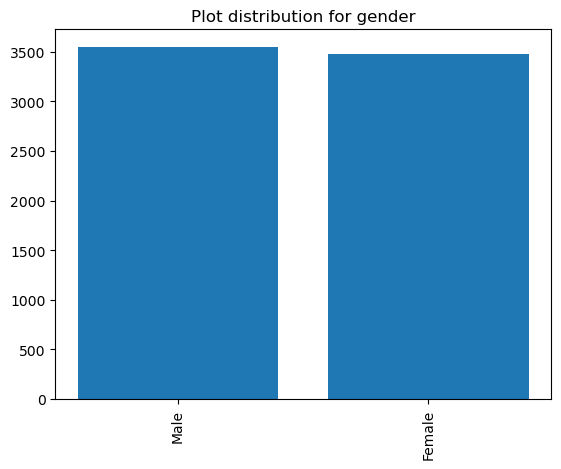

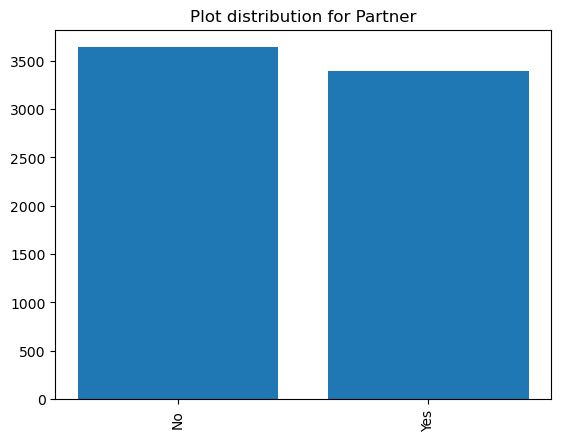

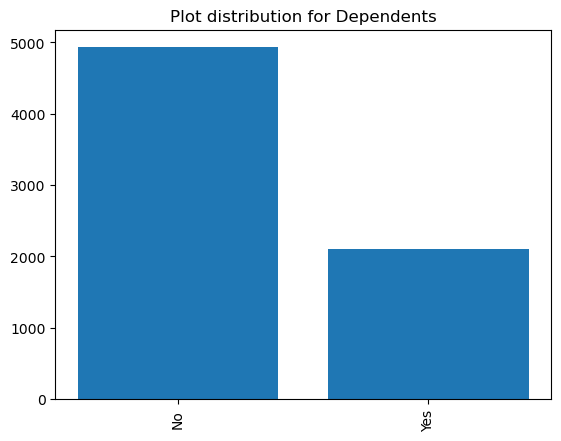

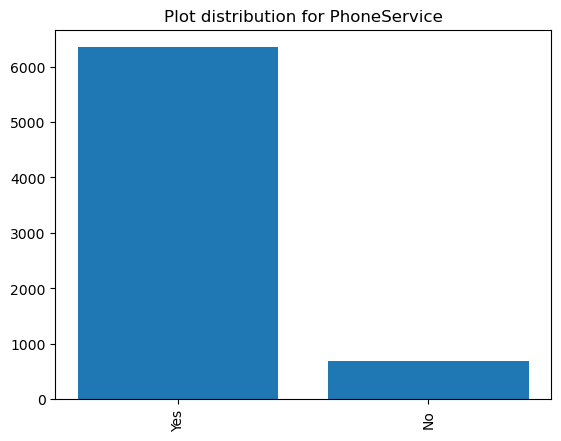

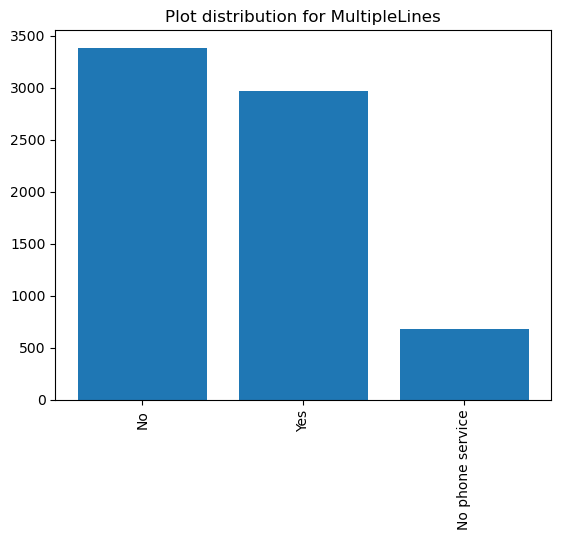

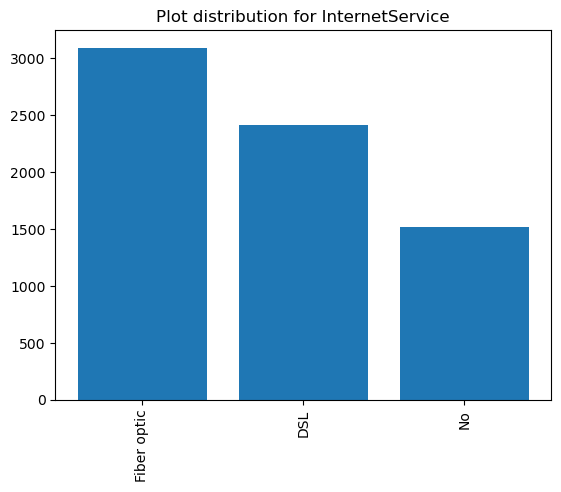

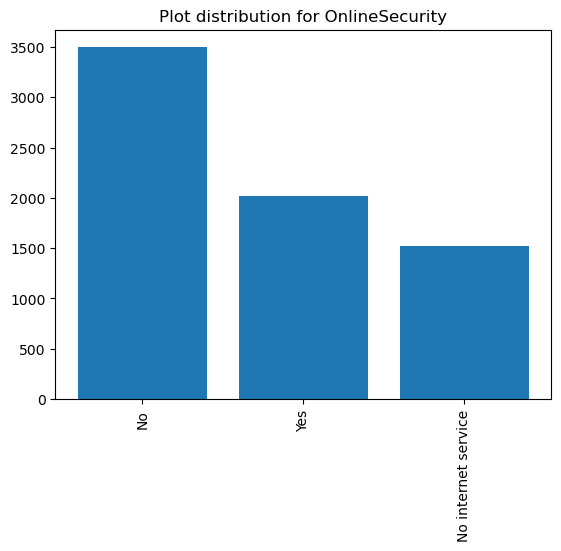

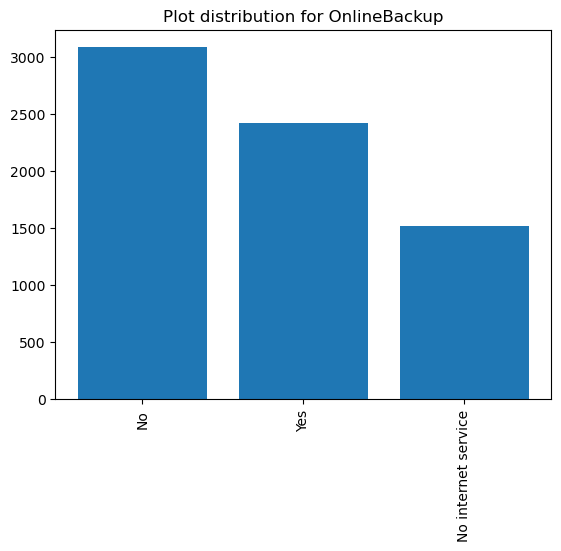

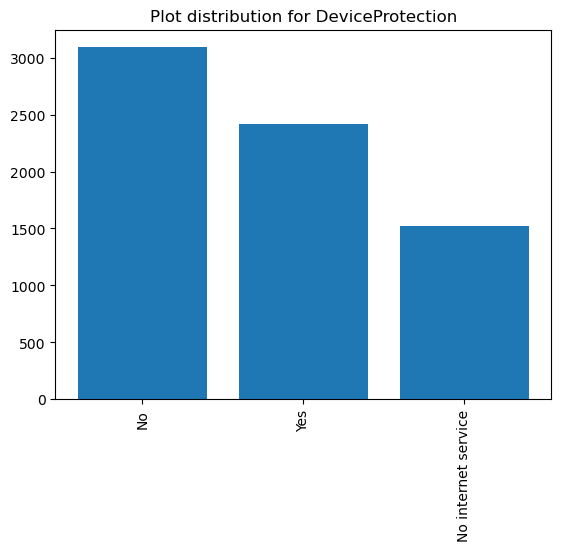

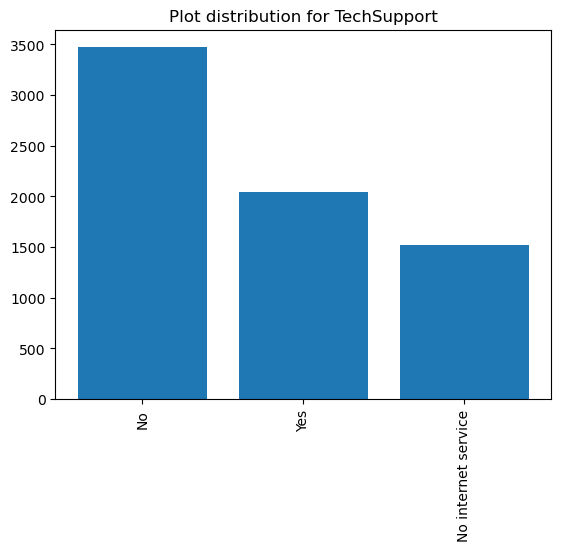

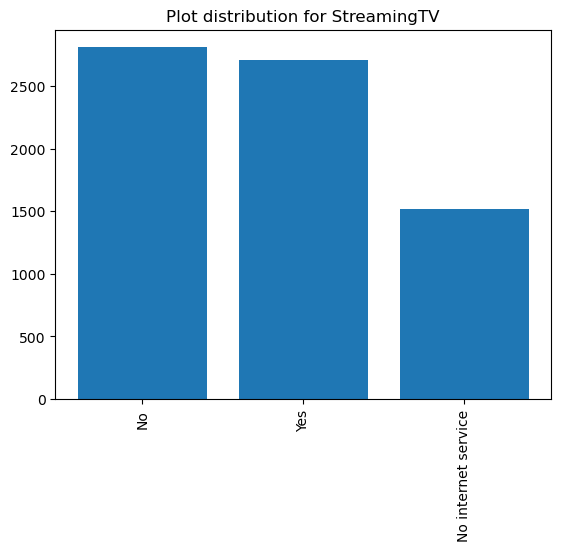

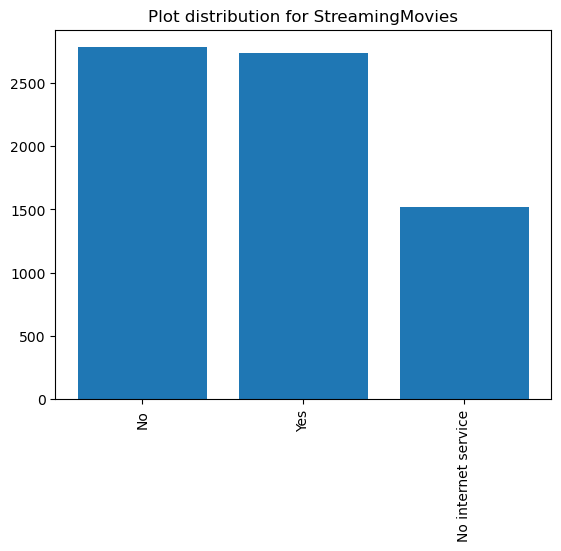

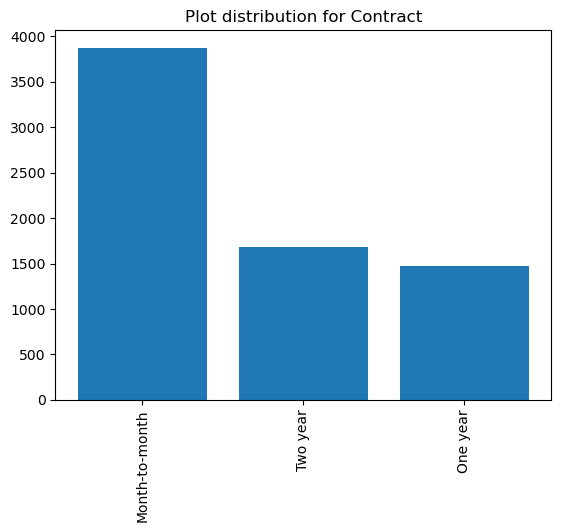

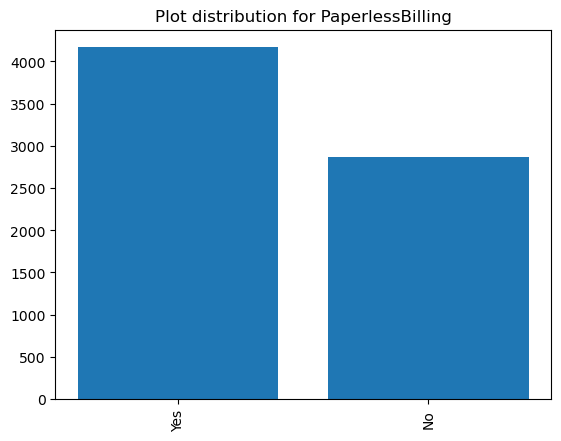

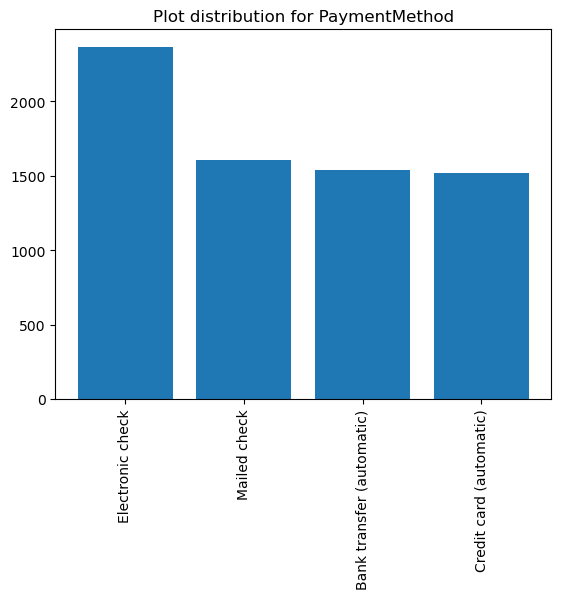

In [331]:
for column in cat_cols:
    vcount = df[column].value_counts()
    plt.bar(vcount.index, vcount.values)
    plt.title(f"Plot distribution for {column}")
    plt.xticks(rotation=90)
    plt.show()

In [332]:
for col in cat_cols:
    print(df[col].value_counts())
    print("\n")

gender
Male      3549
Female    3483
Name: count, dtype: int64


Partner
No     3639
Yes    3393
Name: count, dtype: int64


Dependents
No     4933
Yes    2099
Name: count, dtype: int64


PhoneService
Yes    6352
No      680
Name: count, dtype: int64


MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


StreamingTV
No       

## Insights and Descriptive Analysis

In [333]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

num_cols.append('Churn')

if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

for col in cat_cols:
    print(f"\nGrouped Analysis by: {col}")
    print(df.groupby(col)[num_cols].mean().round(2))
    print("\n")


Grouped Analysis by: gender
        SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
gender                                                            
Female           0.16   32.29           65.22       2283.19   0.27
Male             0.16   32.55           64.39       2283.41   0.26



Grouped Analysis by: Partner
         SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
Partner                                                            
No                0.16   23.37           61.96       1584.96   0.33
Yes               0.17   42.13           67.85       3032.27   0.20



Grouped Analysis by: Dependents
            SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
Dependents                                                            
No                   0.21   29.81           67.00       2187.71   0.31
Yes                  0.04   38.57           59.62       2507.96   0.16



Grouped Analysis by: PhoneService
              SeniorCitizen  tenure  Monthl

/var/folders/n6/c4lth3xd22b420jmnbprqgbh0000gn/T/ipykernel_53644/1891727493.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


### Demographic Characteristics

Analysis by gender revealed minimal differences in churn behaviour, with female customers exhibiting a churn rate of 27% and male customers 26%. Tenure, monthly charges, and total charges were also nearly identical across genders, suggesting that gender is not a strong determinant of churn in this dataset. This finding supports treating gender as a low-importance feature during modelling.

In contrast, relationship-related variables showed substantial differences. Customers without a partner had a churn rate of 33%, compared to only 20% among those with a partner. Similarly, customers without dependents churned at nearly double the rate (31%) of those with dependents (16%). These groups also differed in tenure and total charges, indicating that household stability and long-term commitments are strongly associated with customer retention.


### Service Usage Patterns

Internet service type emerged as one of the most influential factors in churn behaviour. Customers using fibre optic internet exhibited a churn rate of 42%, significantly higher than DSL users at 19% and customers without internet service at just 7%. Fibre optic users also incurred the highest monthly charges, suggesting that cost sensitivity and service expectations may contribute to increased churn in this group.

A consistent pattern was observed across value-added services such as Online Security, Online Backup, Device Protection, and Tech Support. Customers without these services exhibited churn rates between 39% and 42%, while those who subscribed to these services churned at much lower rates, typically between 15% and 23%. Customers without any internet service consistently demonstrated the lowest churn rates. These results suggest that service bundling and deeper product engagement significantly improve customer retention.


### Entertainment Services

Streaming TV and Streaming Movies services were associated with elevated churn rates. Customers using these services churned at approximately 30%, compared to 34% among non-users and only 7% among customers without internet service. Although streaming customers generally had higher tenure and total charges, entertainment services alone did not guarantee long-term retention, indicating that they may increase cost without proportionately increasing perceived value.


### Contract and Billing Behaviour

Contract type was identified as the strongest predictor of churn in the dataset. Customers on month-to-month contracts exhibited a churn rate of 43%, compared to 11% for one-year contracts and only 3% for two-year contracts. Longer contracts were associated with significantly higher tenure and total charges, demonstrating that contractual commitment plays a critical role in customer retention.

Billing preferences further reinforced this pattern. Customers using paperless billing churned at a rate of 34%, compared to 16% for those using traditional billing. Payment method analysis showed that customers paying via electronic check had the highest churn rate at 45%, while those using automatic bank transfers or credit cards churned at much lower rates (15–17%). These findings suggest that payment friction and billing convenience are closely linked to customer loyalty.


### Summary of Key Findings

The grouped analysis reveals several consistent patterns across customer segments. High churn is associated with shorter tenure, higher monthly charges, flexible contract structures, and lower engagement with value-added services. Conversely, long-term contracts, bundled services, and automatic payment methods are strongly correlated with customer retention.

These insights indicate that churn is driven by behavioural and contractual factors rather than purely demographic characteristics. The findings justify the inclusion of service-level and contract-related features in the modelling stage and support the use of interpretable models capable of capturing these structured relationships.


### Implications for Modelling

The results of the analysis informed key modelling decisions. The strong relationships between churn and variables such as tenure, contract type, and service subscriptions suggest that linear and tree-based models are well-suited to this problem. Additionally, the presence of clearly defined high-risk groups supports a precision oriented modelling strategy, where false positives must be minimised to avoid targeting stable, long-tenure customers unnecessarily.

Overall, this analysis phase provided both statistical insight and business context, ensuring that subsequent modelling choices are grounded in observed customer behaviour rather than purely algorithmic experimentation.

---

### Temporary Numerical Encoding for Exploratory Analysis

At this stage, categorical variables were temporarily encoded into numerical form to enable exploratory techniques such as box plots, correlation analysis, and churn rate visualisations. Many common EDA methods require numeric inputs, and this transformation allows patterns, outliers, and relationships to be examined consistently across all features.

It is important to note that this encoding is not intended for final model training. After completing exploratory analysis, categorical features will reverted or reprocessed using one-hot encoding to avoid introducing artificial ordinality into the models. This two-stage approach ensures that exploratory insights are obtained without compromising the statistical integrity of the final modelling pipeline.

In [334]:
df['gender'].replace({'Male':1, 'Female':0}, inplace=True)
df['Partner'].replace({'Yes':1, 'No':0}, inplace=True)
df['Dependents'].replace({'Yes':1, 'No':0}, inplace=True)
df['PhoneService'].replace({'Yes':1, 'No':0}, inplace=True)
df['MultipleLines'].replace({'Yes':2, 'No':1, 'No phone service': 0}, inplace=True)
df['OnlineSecurity'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['OnlineBackup'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['DeviceProtection'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['TechSupport'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['StreamingTV'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['StreamingMovies'].replace({'Yes':2, 'No':1, 'No internet service': 0}, inplace=True)
df['PaperlessBilling'].replace({'Yes':1, 'No':0}, inplace=True)
df['InternetService'].replace({'Fiber optic':2, 'DSL':1, 'No':0}, inplace=True)
df['Contract'].replace({'Two year':0, 'One year':1, 'Month-to-month':2}, inplace=True)
df['PaymentMethod'].replace({'Credit card (automatic)':4, 'Bank transfer (automatic)':3, 'Electronic check':2, 'Mailed check':1}, inplace=True)

/var/folders/n6/c4lth3xd22b420jmnbprqgbh0000gn/T/ipykernel_53644/2802118804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male':1, 'Female':0}, inplace=True)
/var/folders/n6/c4lth3xd22b420jmnbprqgbh0000gn/T/ipykernel_53644/2802118804.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

### Interpretation of Box Plot Results

While box plots were used to inspect potential outliers, their interpretation was approached with caution. Many of the features in this dataset are discrete in nature, taking on a small set of encoded values (e.g., 0, 1, 2, 3 or 4) rather than representing truly continuous variables. In such cases, box plots can misleadingly label less frequent categories as outliers simply because one category is much more prevalent than others.

As a result, the presence of apparent “outliers” in these plots does not necessarily indicate anomalous data points, but rather reflects natural class imbalances within categorical features. For this reason, no aggressive outlier removal was performed at this stage. Instead, the box plots were used primarily for exploratory understanding, with the decision to retain all values to preserve meaningful customer behaviour patterns for analysis and modelling.

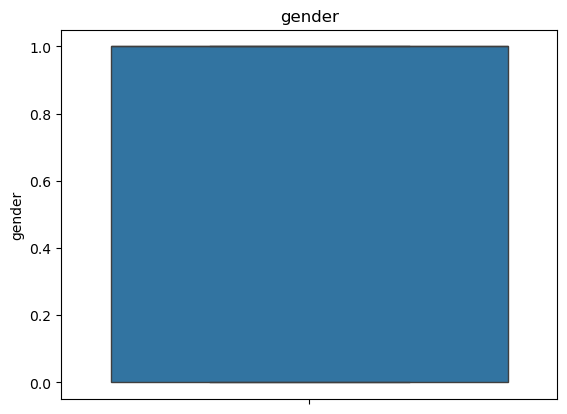

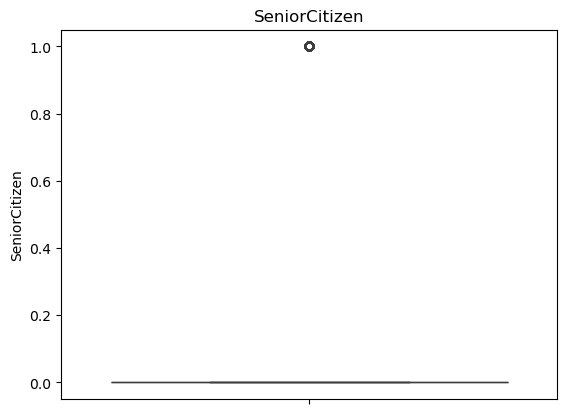

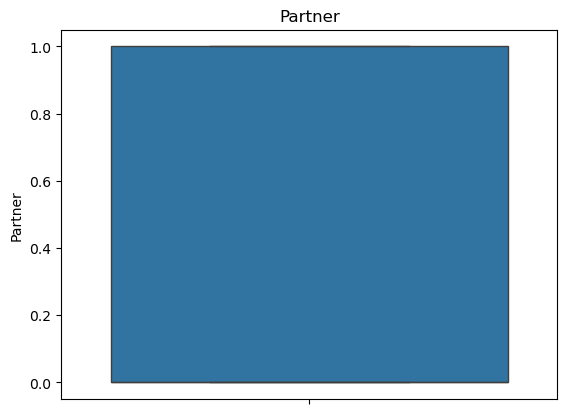

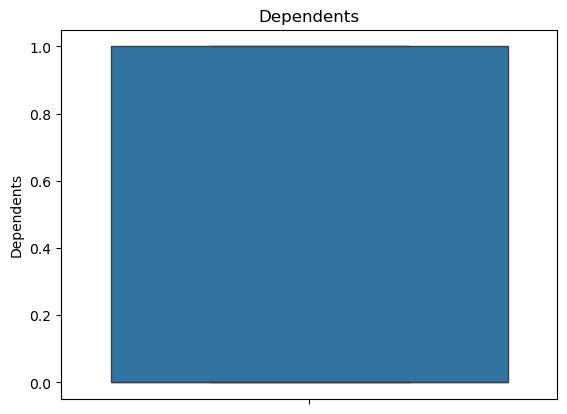

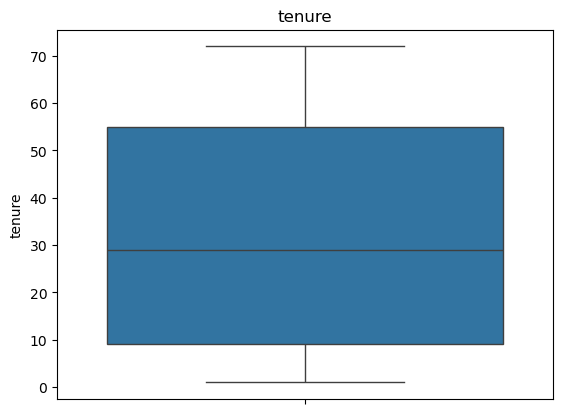

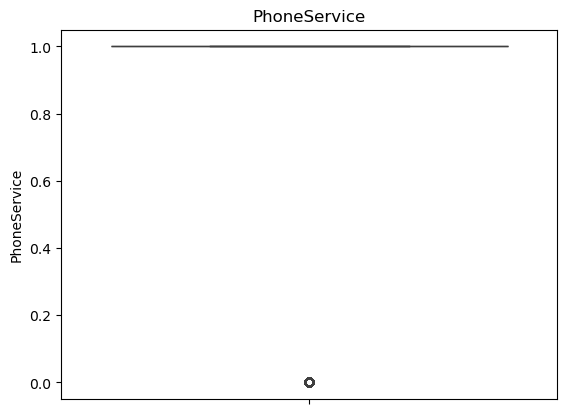

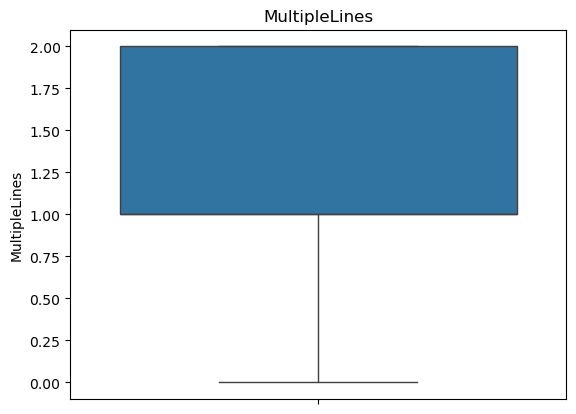

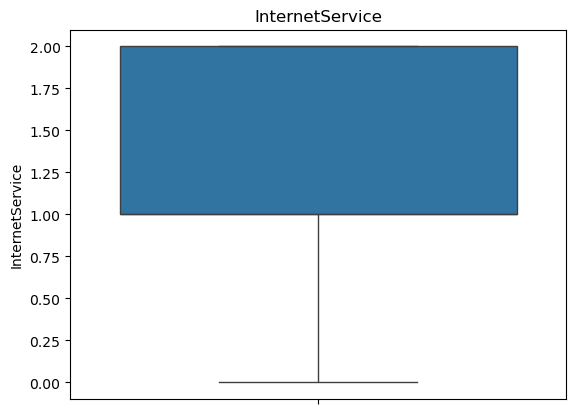

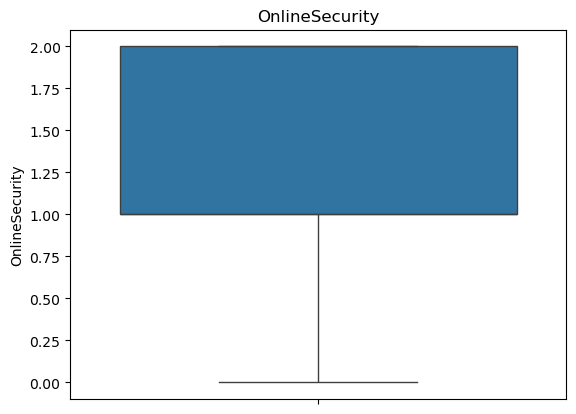

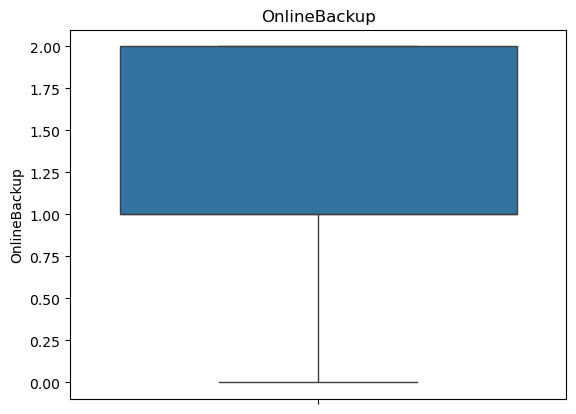

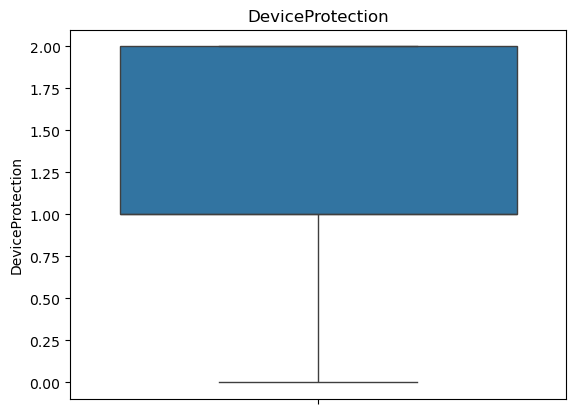

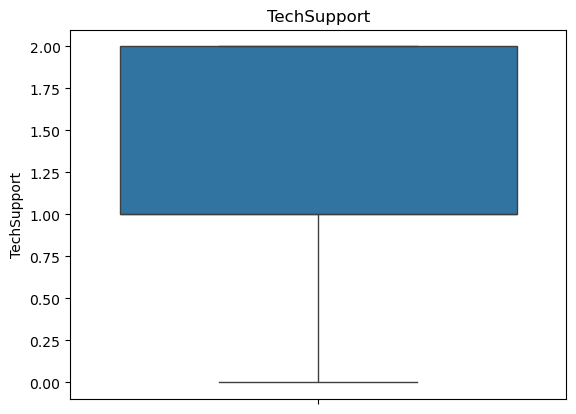

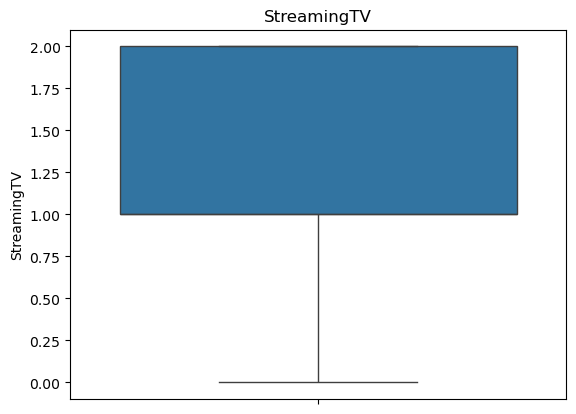

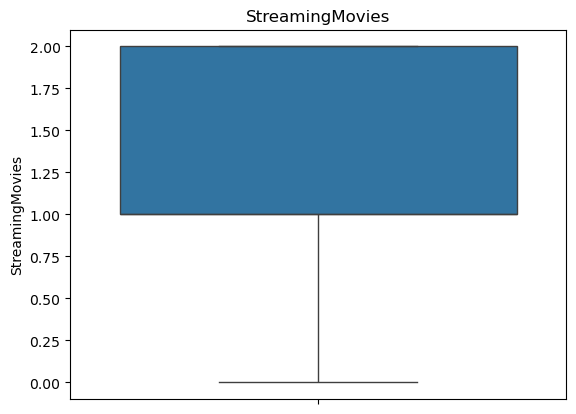

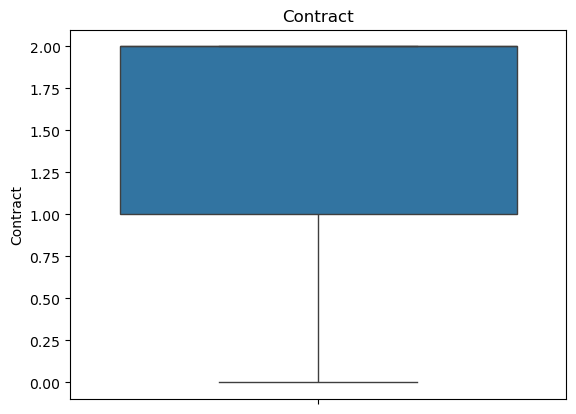

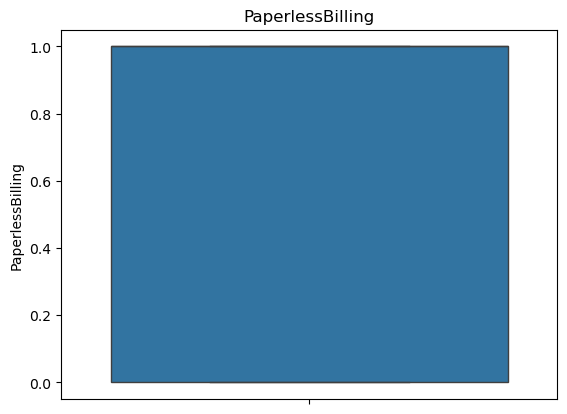

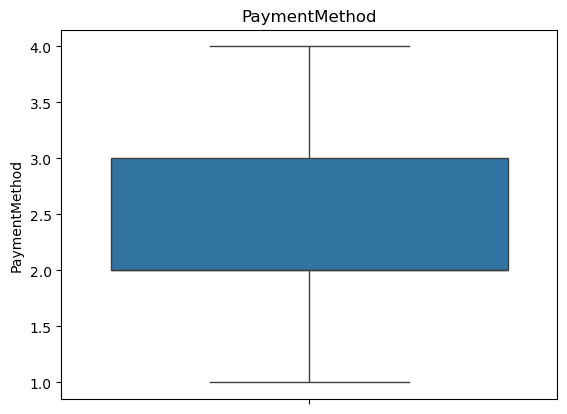

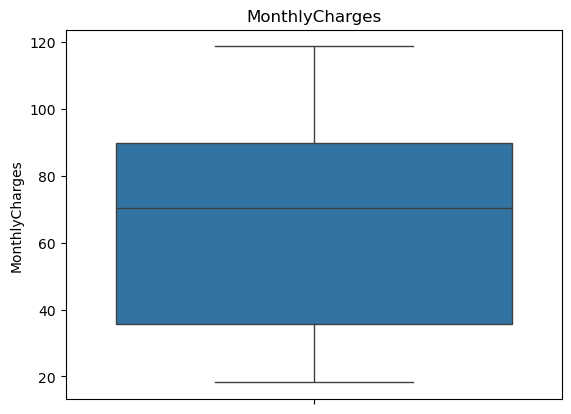

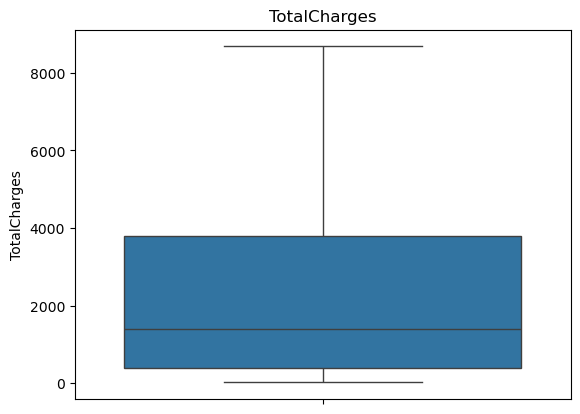

In [335]:
for i in features_column:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

### Correlation Analysis

In this step, we examine the relationships between numeric features and the target variable `Churn`:

- We use a **heatmap** to visualize correlations between all numeric features.
- Positive correlations are shown in warm colors, negative correlations in cool colors.
- We also list the features **sorted by correlation with `Churn`** to identify which variables are most strongly associated with customer churn.

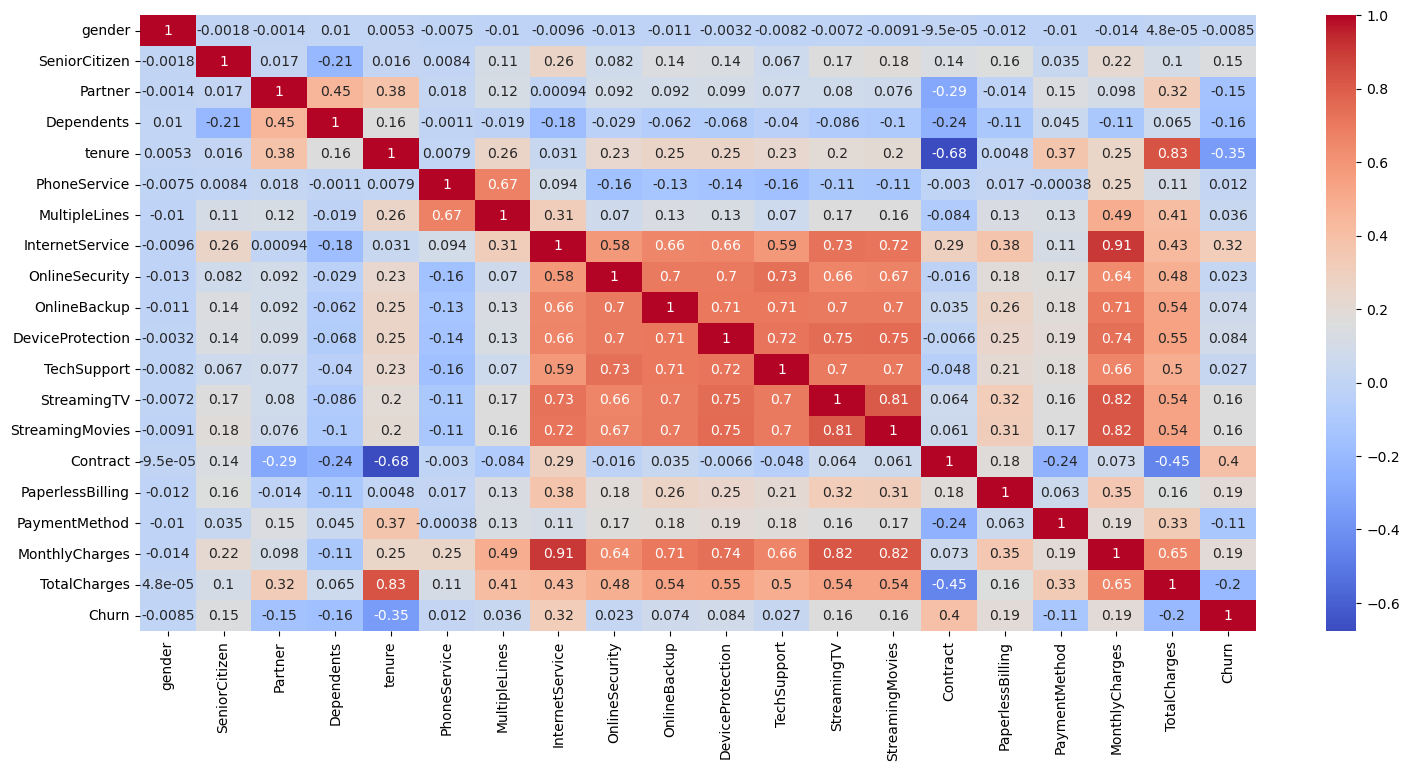

In [336]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [337]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
Contract            0.396150
InternetService     0.316350
MonthlyCharges      0.192858
PaperlessBilling    0.191454
StreamingTV         0.164509
StreamingMovies     0.162672
SeniorCitizen       0.150541
DeviceProtection    0.084402
OnlineBackup        0.073934
MultipleLines       0.036148
TechSupport         0.026744
OnlineSecurity      0.023014
PhoneService        0.011691
gender             -0.008545
PaymentMethod      -0.114332
Partner            -0.149982
Dependents         -0.163128
TotalCharges       -0.199484
tenure             -0.354049
Name: Churn, dtype: float64

## 7. Outlier Analysis and Justification

### Outcome of Outlier Detection

Outlier detection was applied to all columns except `Churn` and `PhoneService`. These two variables were excluded because they are highly imbalanced binary features, and applying Z-score–based methods to such distributions can incorrectly label the minority class as outliers due to skewed value frequencies rather than true numerical extremity.

The remaining features exhibited more reasonable value distributions, making them more suitable for statistical outlier inspection. The analysis identified zero observations beyond the ±3 standard deviation threshold, indicating that no extreme numerical anomalies were present. This confirmed that the dataset could be retained in full for subsequent correlation analysis, feature engineering, and modelling without the need for outlier removal.

In [338]:
outlier_list = []

out_cols = df.drop(columns= ['Churn', 'PhoneService'])
out_cols = out_cols.columns

In [339]:
for column in out_cols:
    nm = (df[column] - np.mean(df[column])) / np.std(df[column])
    outlier_index = df[np.abs(nm) > 3].index
    outlier_list.extend(outlier_index)

In [340]:
unique_outliers = list(set(outlier_list))
len(unique_outliers)

0

In [341]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,2,1,2,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,2,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,2,1,2,70.70,151.65,1


### Churn Rate by Categorical Features

In this section, we explore how customer churn varies across different categorical features:

- For each feature in the dataset (except the last two columns), we plot a **bar chart** showing the churn rate.
- The x-axis represents the **categories** of the feature and the y-axis represents the **churn rate** (proportion of customers who churned).
- This helps identify which categories are more likely to churn and gives insights for feature importance and potential interventions.

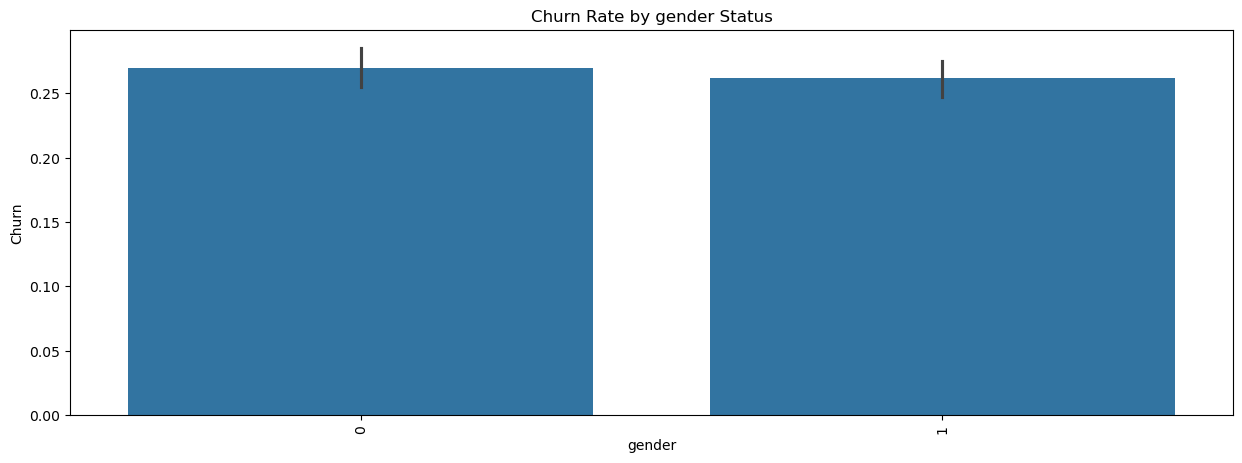

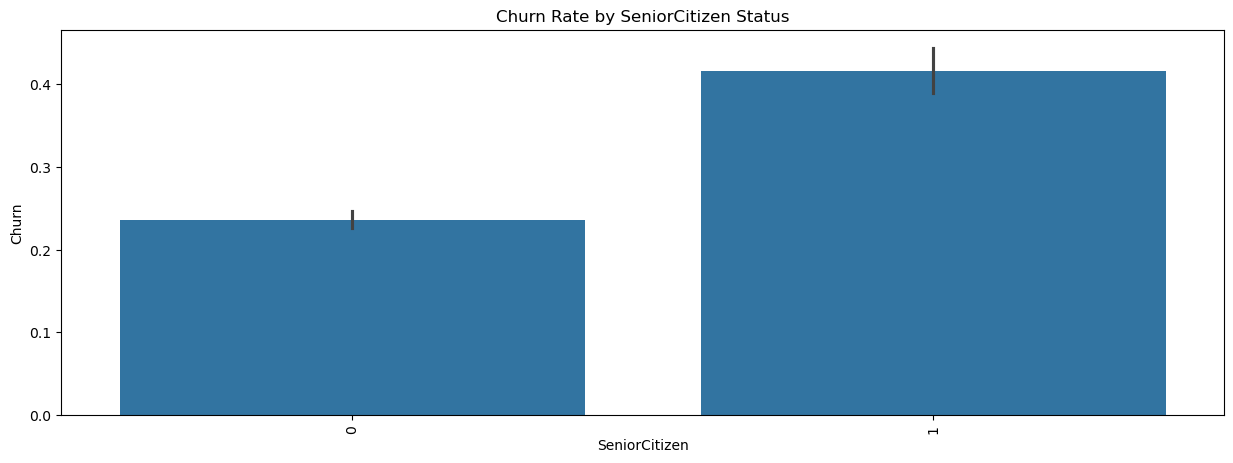

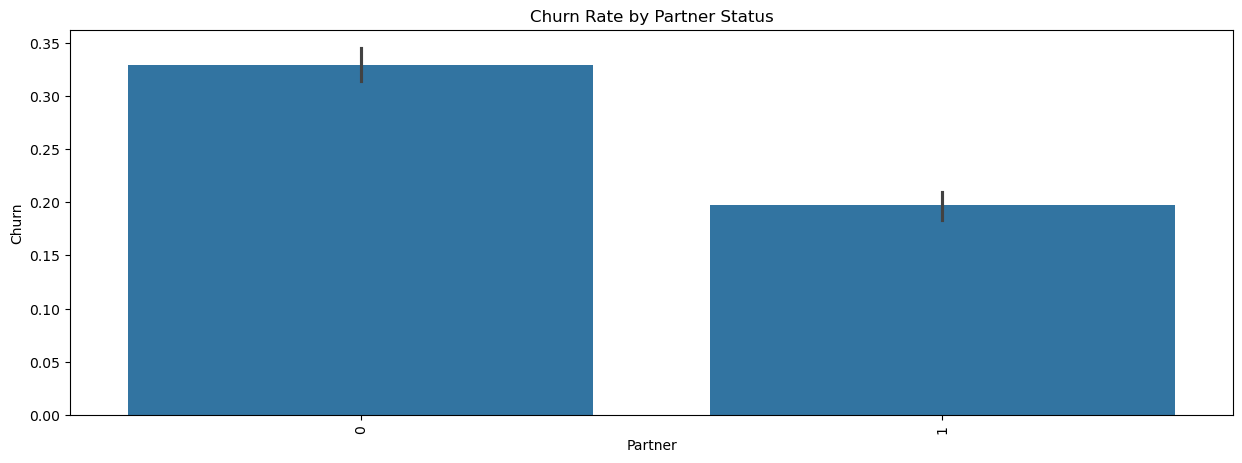

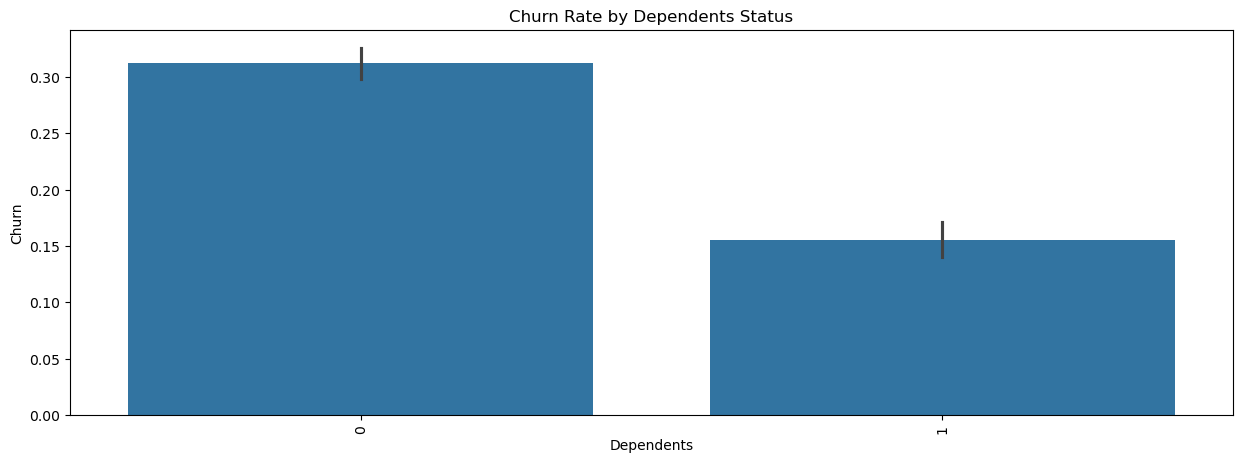

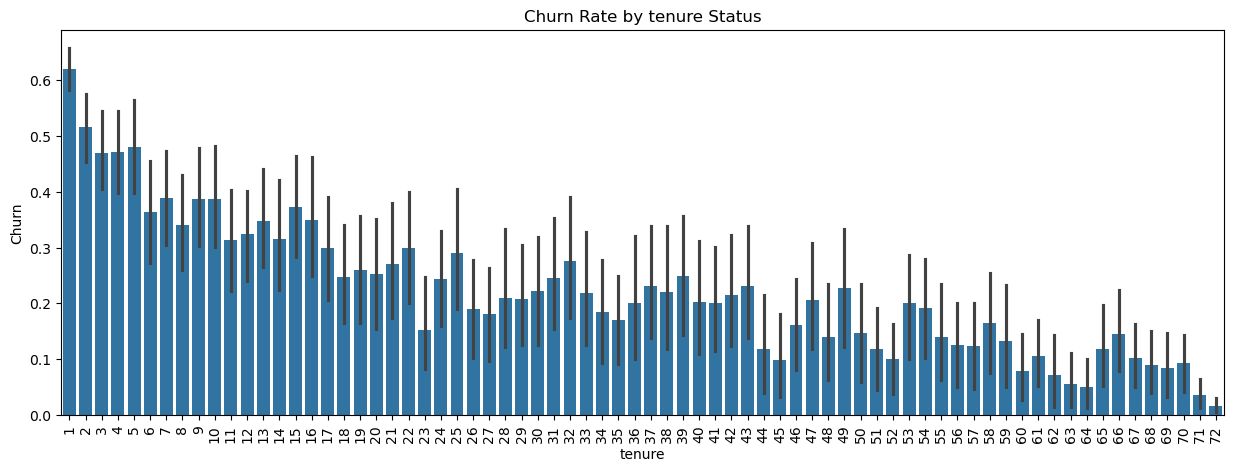

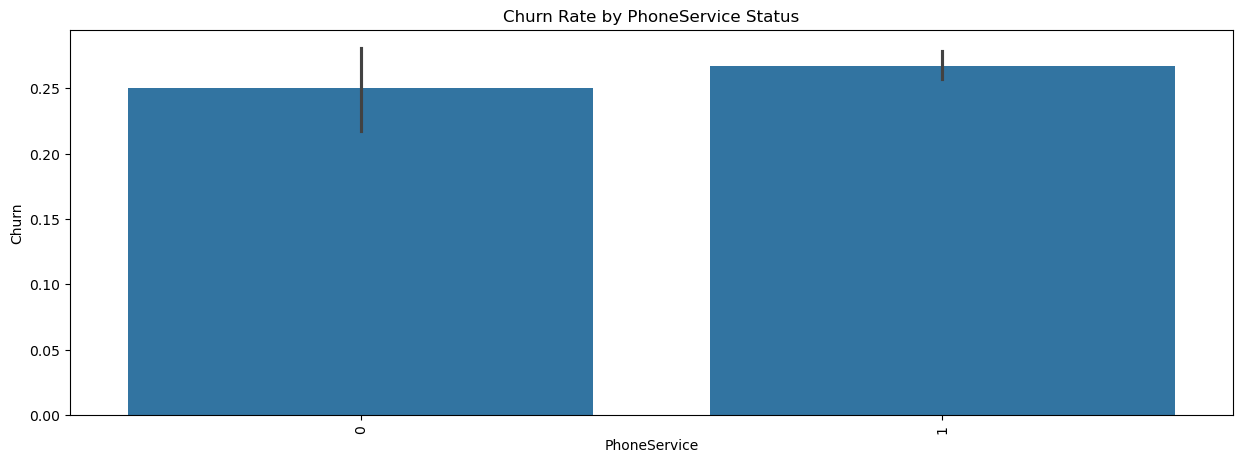

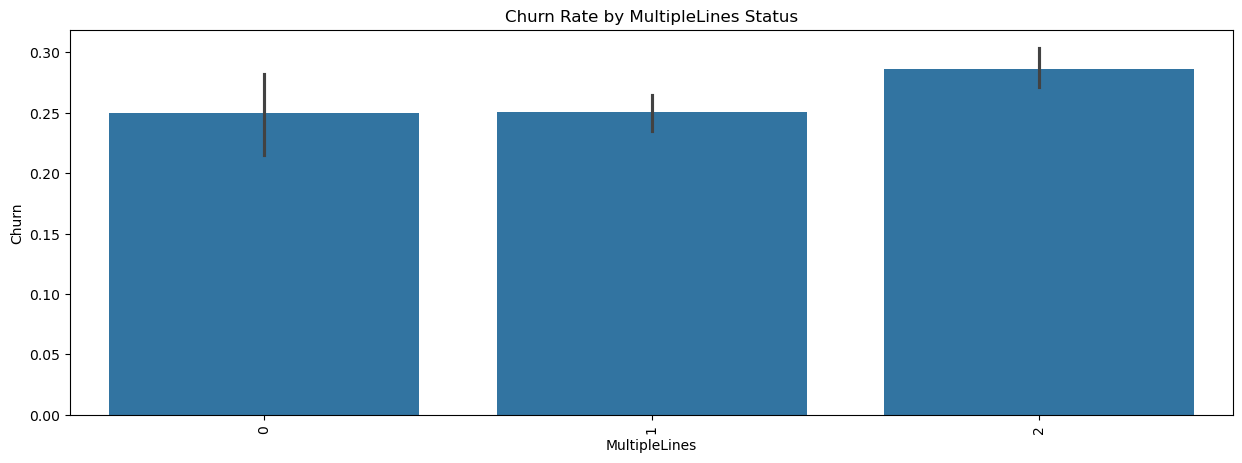

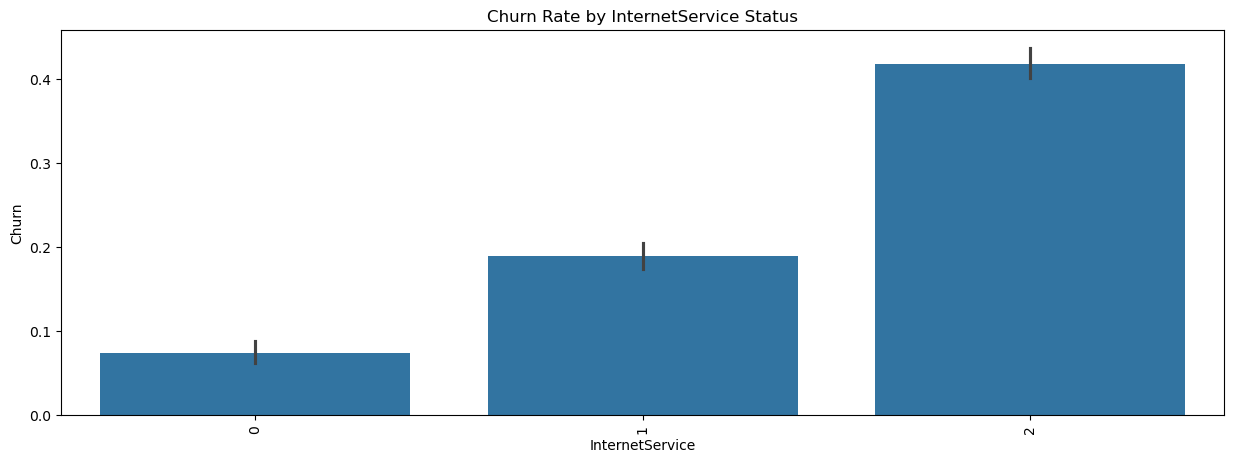

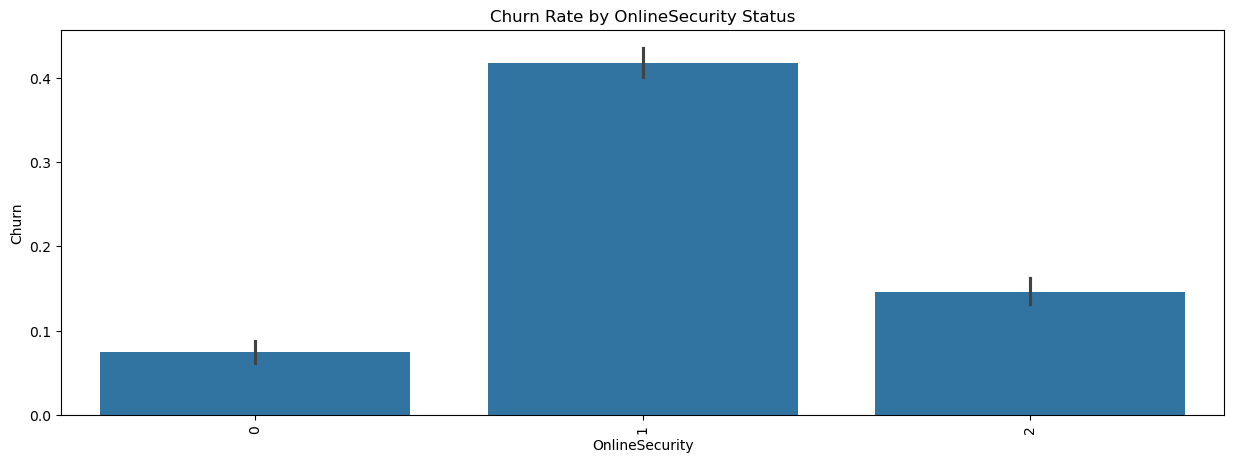

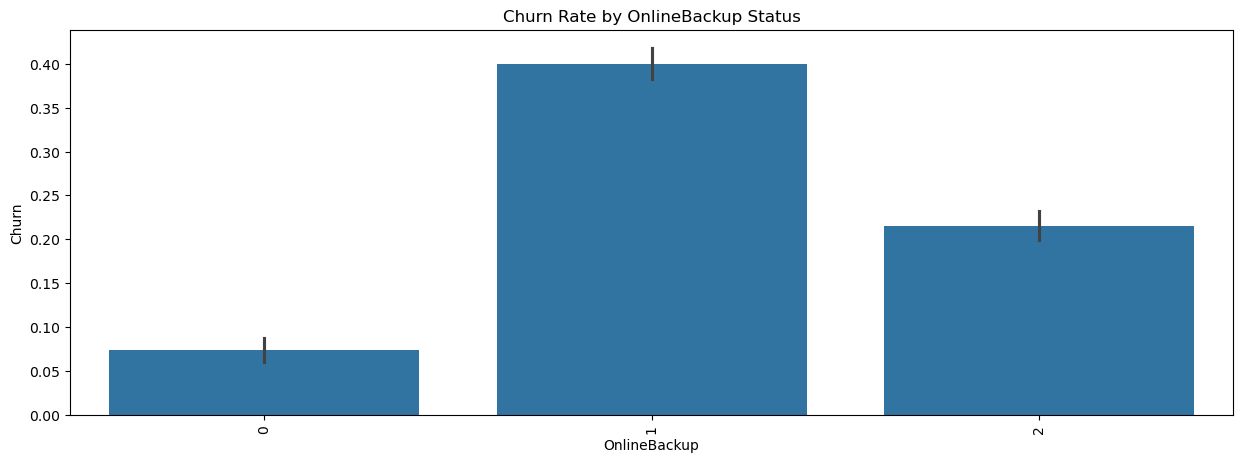

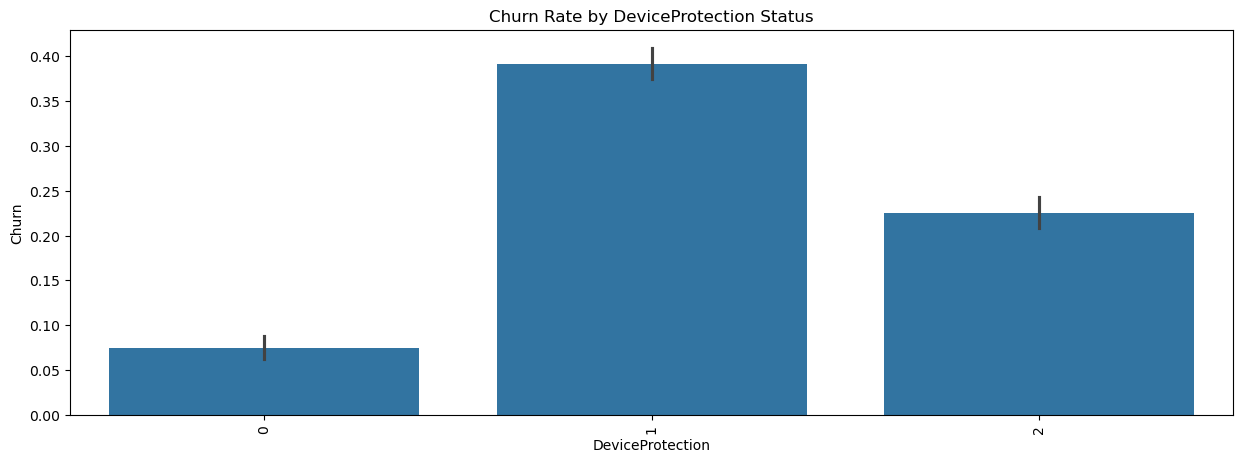

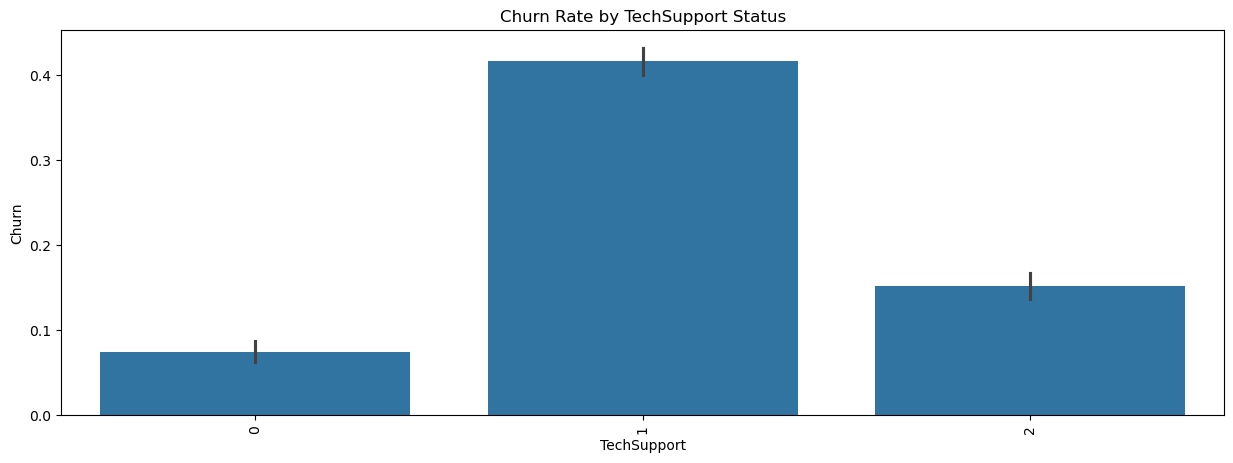

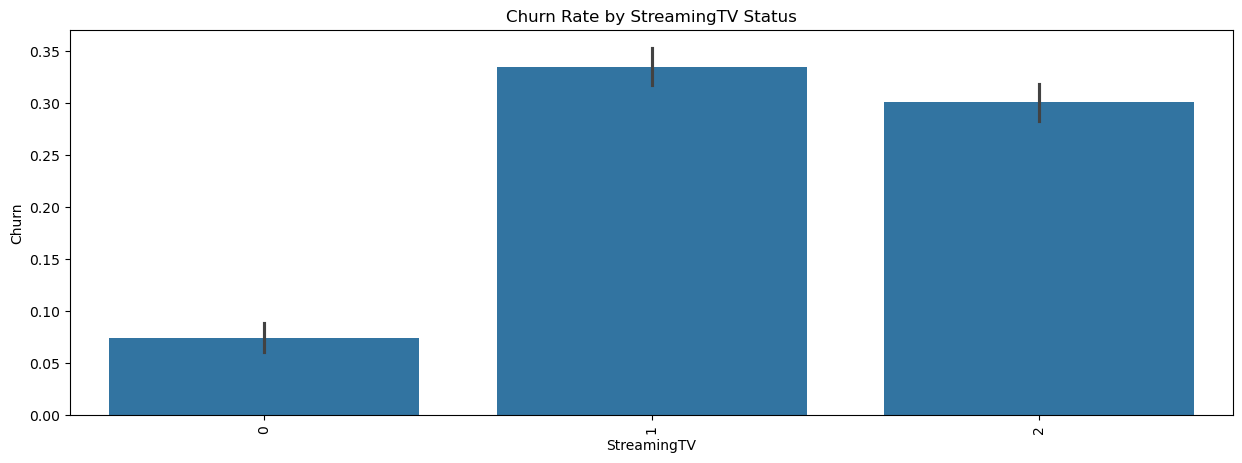

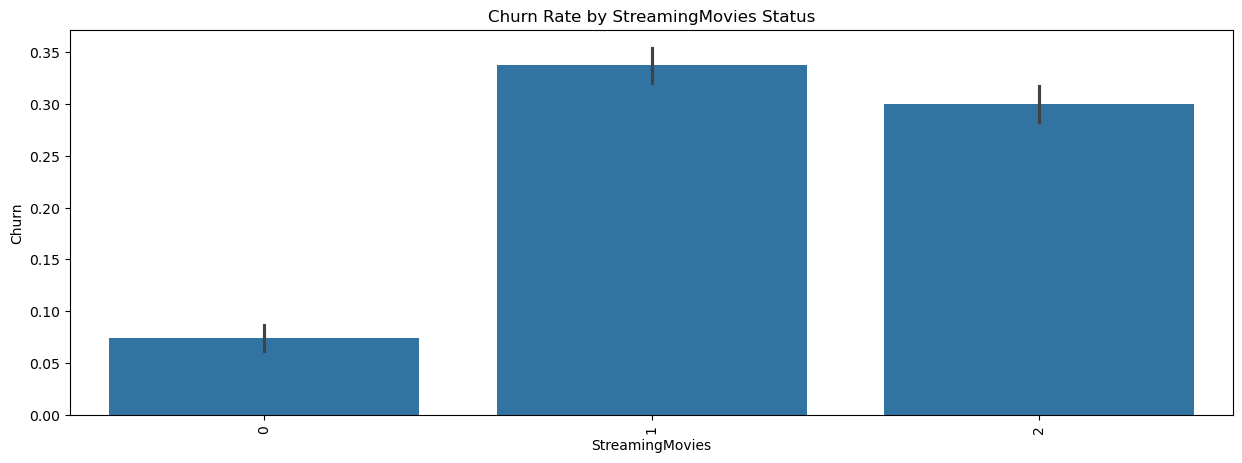

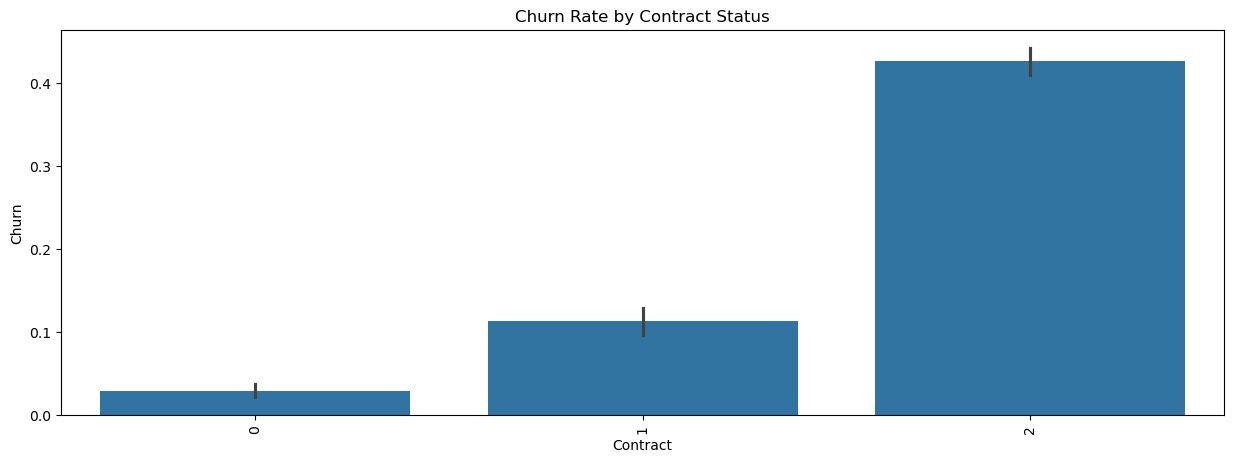

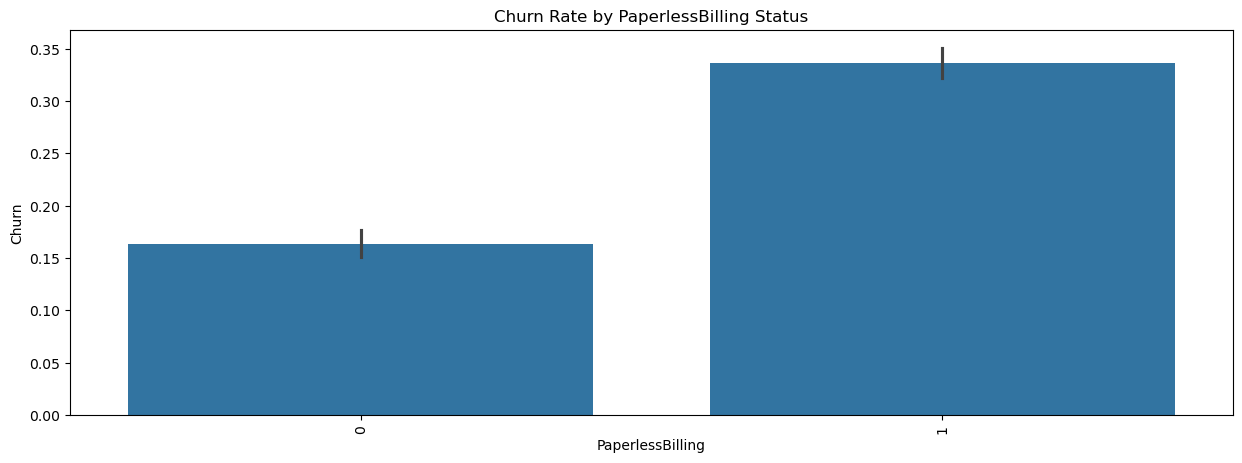

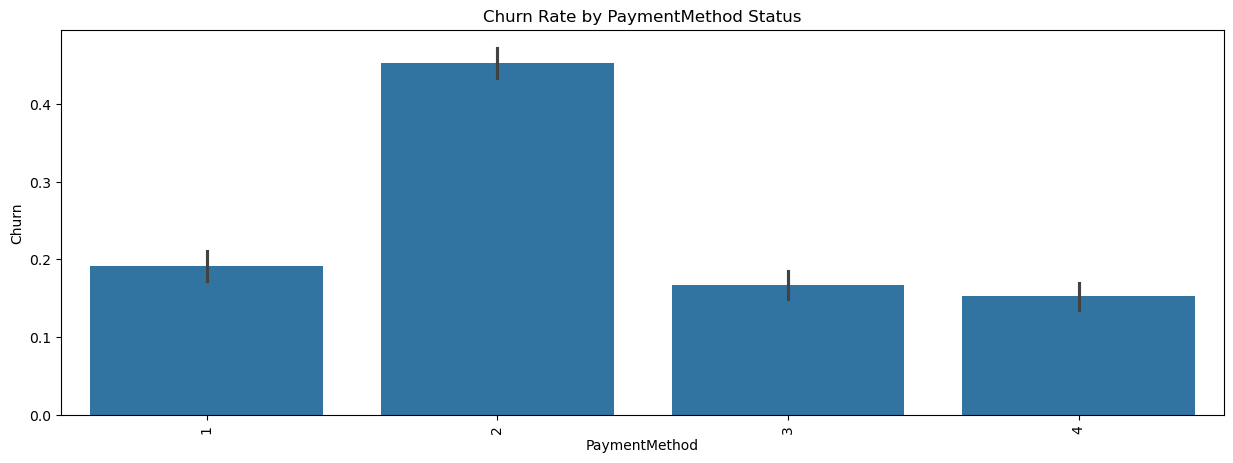

In [342]:
for col in features_column[:-2]:
    plt.figure(figsize=(15,5))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f'Churn Rate by {col} Status')
    plt.ylabel('Churn')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.show()

### Reverting Encoded Features Back to Their Original Categories

After using numeric encodings to support statistical checks such as outlier detection and correlation analysis, the categorical features were converted back to their original labels. This makes the data easier to understand and interpret when exploring customer behaviour and churn patterns.

Using readable category names helps avoid confusion and ensures that plots, summaries, and grouped analyses clearly reflect real customer attributes rather than abstract numeric codes. This step keeps the analysis grounded in business context before moving on to modelling.

In [343]:
df['gender'].replace({1: 'Male', 0: 'Female'}, inplace=True)
df['Partner'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['Dependents'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['PhoneService'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['MultipleLines'].replace({2: 'Yes', 1: 'No', 0: 'No phone service'}, inplace=True)
df['OnlineSecurity'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['OnlineBackup'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['DeviceProtection'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['TechSupport'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['StreamingTV'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['StreamingMovies'].replace({2: 'Yes', 1: 'No', 0: 'No internet service'}, inplace=True)
df['PaperlessBilling'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['InternetService'].replace({2: 'Fiber optic', 1: 'DSL', 0: 'No'}, inplace=True)
df['Contract'].replace({0: 'Two year', 1: 'One year', 2: 'Month-to-month'}, inplace=True)
df['PaymentMethod'].replace({4: 'Credit card (automatic)', 3: 'Bank transfer (automatic)', 2: 'Electronic check', 1: 'Mailed check'}, inplace=True)

### Data Preview and Target Distribution Check

The first few rows of the dataset were inspected to confirm that all columns were correctly formatted after preprocessing. This quick sanity check helps ensure that earlier transformations did not introduce unexpected issues or inconsistencies.

The distribution of the target variable (`Churn`) was then examined to understand class balance, which is critical for modelling decisions and metric selection. Finally, a copy of the cleaned dataset was saved to preserve a stable reference point before proceeding with further analysis.

In [344]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [345]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [346]:
keep_a_copy = df.copy()

## 8. Train–Test Split

The dataset was split into two distinct subsets at first training and test sets. The training set was used to learn model parameters which was split to cross validation point, the validation set was used for hyperparameter optimisation, and the test set was reserved strictly for final, unbiased performance evaluation.

This separation mirrors industry best practices and ensures that the reported test metrics genuinely reflect model generalisation to unseen data. Importantly, the test set was never used during model selection or tuning, preventing information leakage and overly optimistic performance estimates.

### Feature–Target Separation

The dataset was split into input features (`X`) and the target variable (`y`) to prepare for modelling. Separating predictors from the outcome variable is a fundamental step in supervised learning and ensures a clean and consistent training workflow.

A transposed preview of the feature matrix and a sample of the target values were inspected to verify that the split was performed correctly. This check confirms that all relevant customer attributes are included in the feature set and that the churn labels align properly with each observation.

In [347]:
X = df.drop(columns='Churn')
y = df['Churn']

In [348]:
X.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No
tenure,1,34,2,45,2,8,22,10,28,62,13,16,58,49,25
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,No,No,Yes,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,No,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No internet service,No,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No internet service,No,Yes,No


In [349]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Train–Test Split with Stratification

The dataset was split into training and test sets using a 70–30 ratio. Stratification was applied to ensure that the class distribution of the target variable (`Churn`) remained consistent across both sets, which is especially important given the imbalance between churned and non-churned customers.

A fixed random seed was used to make the split reproducible, allowing results to be reliably compared across experiments. The training set was then previewed to confirm that the split was successful and that the feature structure remained intact.

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , stratify=y, random_state=42)

In [351]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4499,Female,0,No,Yes,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,78.30,909.25
1933,Male,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,415.90
4668,Female,0,No,Yes,2,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),61.20,125.95
5681,Female,1,Yes,No,34,Yes,No,DSL,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.30
3610,Female,0,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.15,1164.30


## 9. Feature Encoding and Dataset Preparation

### One-Hot Encoding of Categorical Features

Categorical variables were transformed using one-hot encoding to make them suitable for machine learning models. Dropping the first category helps reduce redundancy, while ignoring unknown categories ensures the model can handle unseen values in the test set without errors.

The encoder was fitted only on the training data to prevent data leakage, and the learned encoding was then applied to the test set. Extracting the generated feature names allows the transformed dataset to remain interpretable and makes it easier to track how each original category contributes to model behaviour.

In [352]:
ohe = OneHotEncoder(
    drop='first',
    handle_unknown='ignore',
    sparse_output=False
)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

In [353]:
ohe_cols = ohe.get_feature_names_out(cat_cols)
ohe_cols

array(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

### Converting Encoded Features Back to DataFrames

After one-hot encoding the categorical variables, the resulting arrays were converted back into pandas DataFrames. Assigning meaningful column names and preserving the original row indices ensures that the transformed features remain interpretable and correctly aligned with the rest of the dataset.

This step is especially important when combining encoded categorical features with numerical variables later as we will do. Keeping everything in DataFrame format also simplifies debugging, inspection, and model development.

In [354]:
X_train_cat = pd.DataFrame(
    X_train_cat, columns=ohe_cols, index=X_train.index
)

X_train_cat.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4499,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1933,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4668,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5681,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3610,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [355]:
X_test_cat = pd.DataFrame(
    X_test_cat, columns=ohe_cols, index=X_test.index
)

X_test_cat.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4221,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2375,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5462,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1791,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Combining Numerical and Encoded Categorical Features

Before constructing the final modelling dataset, the target variable (`Churn`) was removed from the list of numerical features to prevent error. The numerical features were then combined with the one-hot encoded categorical features to form the final feature matrices for both the training and test sets.

Concatenating these feature sets ensures that all relevant customer information is represented in a single, consistent structure. This unified dataset can now be safely passed into machine learning models, preserving both numerical signals and categorical distinctions.

In [356]:
if 'Churn' in num_cols:
    num_cols.remove('Churn')

In [357]:
X_train_final = pd.concat(
    [X_train[num_cols], X_train_cat], axis=1
)

X_train_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4499,0,12,78.30,909.25,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1933,0,20,19.70,415.90,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4668,0,2,61.20,125.95,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5681,1,34,64.20,2106.30,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3610,0,12,100.15,1164.30,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [358]:
X_test_final = pd.concat(
    [X_test[num_cols], X_test_cat], axis=1
)

X_test_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4221,0,1,19.30,19.30,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1820,0,6,45.65,323.45,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2375,1,71,109.70,7904.25,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5462,0,64,70.15,4480.70,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1791,0,44,61.50,2722.20,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## 10. Feature Scaling

After constructing the final feature matrices, numerical scaling was applied using `StandardScaler`. This technique standardises features by transforming them to have a mean of 0 and a standard deviation of 1.

The scaler was **fitted only on the training data** and then applied to both the training and test sets. This prevents data leakage from the test set and ensures that both datasets are scaled consistently.

Feature scaling is particularly important for models that are sensitive to feature magnitude, such as Logistic Regression, and distance-based algorithms.

In [359]:
std_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    std_scaler.fit_transform(X_train_final),
    columns=X_train_final.columns,
    index=X_train_final.index
)

X_test_scaled = pd.DataFrame(
    std_scaler.transform(X_test_final),
    columns=X_test_final.columns,
    index=X_test_final.index
)

In [360]:
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4499,-0.440546,-0.833469,0.444749,-0.607066,-1.003256,-0.971159,1.530190,0.327584,-0.327584,1.163087,...,-0.528305,-0.796323,-0.528305,-0.793940,-0.509063,-0.569373,0.825234,-0.527676,1.398627,-0.536791
1933,-0.440546,-0.508058,-1.492135,-0.823672,0.996755,-0.971159,-0.653514,0.327584,-0.327584,-0.859781,...,1.892846,-0.796323,1.892846,-0.793940,1.964392,-0.569373,0.825234,-0.527676,-0.714987,1.862923
4668,-0.440546,-1.240233,-0.120451,-0.950975,-1.003256,-0.971159,1.530190,0.327584,-0.327584,-0.859781,...,-0.528305,-0.796323,-0.528305,1.259541,-0.509063,-0.569373,0.825234,1.895104,-0.714987,-0.536791
5681,2.269912,0.061411,-0.021293,-0.081500,-1.003256,1.029697,-0.653514,0.327584,-0.327584,-0.859781,...,-0.528305,1.255772,-0.528305,-0.793940,1.964392,-0.569373,-1.211778,-0.527676,-0.714987,-0.536791
3610,-0.440546,-0.833469,1.166949,-0.495086,-1.003256,-0.971159,-0.653514,0.327584,-0.327584,1.163087,...,-0.528305,1.255772,-0.528305,1.259541,-0.509063,-0.569373,0.825234,-0.527676,-0.714987,-0.536791


In [361]:
X_test_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4221,-0.440546,-1.280909,-1.505356,-0.997800,0.996755,-0.971159,-0.653514,0.327584,-0.327584,-0.859781,...,1.892846,-0.796323,1.892846,-0.793940,-0.509063,-0.569373,-1.211778,1.895104,-0.714987,-0.536791
1820,-0.440546,-1.077527,-0.634419,-0.864262,-1.003256,1.029697,-0.653514,0.327584,-0.327584,-0.859781,...,-0.528305,-0.796323,-0.528305,-0.793940,-0.509063,-0.569373,-1.211778,-0.527676,-0.714987,1.862923
2375,2.269912,1.566437,1.482602,2.464095,-1.003256,1.029697,-0.653514,0.327584,-0.327584,-0.859781,...,-0.528305,1.255772,-0.528305,1.259541,-0.509063,1.756316,0.825234,-0.527676,-0.714987,-0.536791
5462,-0.440546,1.281702,0.175370,0.960982,0.996755,1.029697,-0.653514,0.327584,-0.327584,1.163087,...,-0.528305,-0.796323,-0.528305,1.259541,1.964392,-0.569373,0.825234,-0.527676,-0.714987,1.862923
1791,-0.440546,0.468175,-0.110535,0.188911,-1.003256,1.029697,-0.653514,0.327584,-0.327584,-0.859781,...,-0.528305,-0.796323,-0.528305,-0.793940,1.964392,-0.569373,0.825234,-0.527676,-0.714987,1.862923


## 11. Modelling Approach and Hyperparameter Optimisation

At this stage, multiple supervised learning models were trained to address the churn prediction task. Rather than relying on a single algorithm, a comparative modelling approach was adopted to evaluate how different model families perform on the same preprocessed dataset. This allows strengths and weaknesses to be assessed in terms of predictive power, robustness to class imbalance, and suitability for the business objective.

Four models with varying levels of complexity were selected and trained under a consistent evaluation framework. This approach ensures a fair comparison and helps determine whether increased model complexity leads to meaningful performance gains. Final model selection is based not only on overall performance metrics but also on alignment with the problem context and interpretability requirements.

## Model 1: Logistic Regression Model

#### Logistic Regression (Baseline Model)

Logistic Regression was used as a baseline classification model due to its interpretability and strong performance on binary classification problems. Given the class imbalance present in churn data, class weighting was applied to ensure the minority class received appropriate importance during training.

Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation. L1 regularisation was selected to encourage sparsity and reduce model complexity, while precision was chosen as the primary optimisation metric to align with the business objective of minimising false churn predictions.

In [362]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
    'solver': ['liblinear'],
    'penalty': ["l1"],
}

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml/li

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.002, ...], 'penalty': ['l1'], 'solver': ['liblinear']}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


## Logistic Regression – Model Selection and Prediction

After hyperparameter tuning using GridSearchCV, the best-performing Logistic Regression model was selected based on **precision**. The optimal model configuration was extracted using `best_estimator_` and then applied to the unseen test data to generate churn predictions.

This step represents the transition from **model training** to **model evaluation**, where performance is assessed on data the model has not seen before.

In [363]:
best_model = grid.best_estimator_

best_model

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [364]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

## Logistic Regression with L1 Regularization (Lasso)

In this step, we build a **logistic regression model with L1 penalty** that:

- Performed **feature selection** automatically, since L1 regularization (Lasso) can shrink less important feature coefficients to **zero**.
- Identified the **most important features** that influence churn.

The code below creates a table of feature coefficients and filters out those that are zero, showing only the **important features** retained by the model.

In [365]:
check = pd.DataFrame({'columns':X_train_scaled.columns, 'Coefficient':best_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
important_features = check[check['Coefficient'] != 0]
print(important_features)

                             columns  Coefficient
10       InternetService_Fiber optic     0.413155
28    PaymentMethod_Electronic check     0.174358
26              PaperlessBilling_Yes     0.092137
23               StreamingMovies_Yes     0.035661
0                      SeniorCitizen     0.030487
21                   StreamingTV_Yes     0.027293
6                     Dependents_Yes    -0.051352
19                   TechSupport_Yes    -0.074715
13                OnlineSecurity_Yes    -0.094398
24                 Contract_One year    -0.176221
14  OnlineBackup_No internet service    -0.282003
25                 Contract_Two year    -0.344752
1                             tenure    -0.596014


## Model Performance Evaluation

After training the model and making predictions, we evaluate its performance using a **classification report**, which includes:

- **Precision**: How many predicted churns were actually churns.  
- **Recall**: How many actual churns were correctly predicted.  
- **F1-score**: Harmonic mean of precision and recall, giving a balanced measure.  
- **Support**: Number of samples for each class.

This report helps us understand how well the model predicts both **churned** and **non-churned** customers.

In [366]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1549
           1       0.48      0.81      0.61       561

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.73      2110



## Confusion Matrix Interpretation

The confusion matrix summarises the model’s predictions:

- **True Positives (TP)**: Correctly predicted churners  
- **False Positives (FP)**: Customers predicted to churn but did not  
- **False Negatives (FN)**: Actual churners the model failed to identify  
- **True Negatives (TN)**: Correctly predicted non-churners  

Because the model was optimised for **precision**, it prioritises reducing false positives, even if this slightly lowers recall.

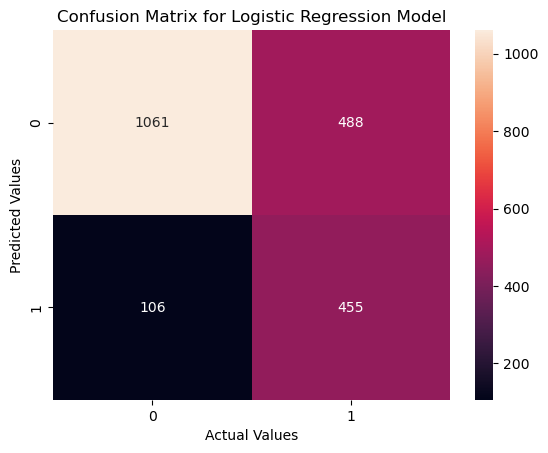

In [367]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', linecolor="k")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

## ROC Curve for Logistic Regression

To evaluate the model's ability to distinguish between churned and non-churned customers, we plot the **ROC (Receiver Operating Characteristic) curve**:

- The x-axis represents the **False Positive Rate (FPR)**.
- The y-axis represents the **True Positive Rate (TPR)**.
- The diagonal line (`--`) represents a **random classifier** (baseline).  
- The curve above the diagonal indicates the model's **discriminative ability**.
- The **area under the curve (AUC)** can be used as a single metric to summarize the model's performance: the higher, the better.

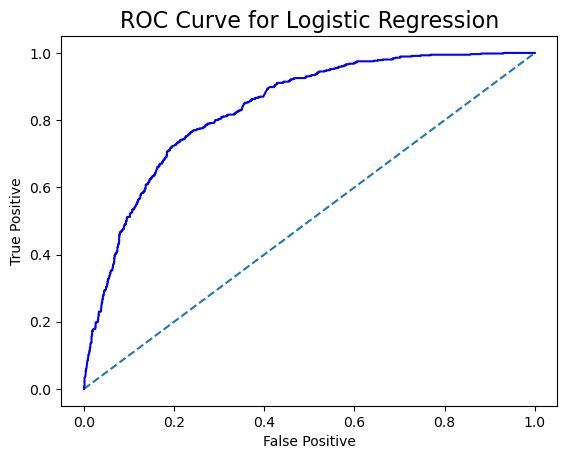

In [368]:
y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], '--' )
plt.plot(fpr, tpr, label='Logistic Regression', color = "b")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.show() 

## Model Evaluation Metrics

To properly evaluate the model, multiple classification metrics were used:

- **Accuracy**: Overall proportion of correct predictions  
- **Precision**: Proportion of predicted churners who actually churned  
- **Recall**: Proportion of actual churners correctly identified  
- **F1-score**: Harmonic mean of precision and recall  

These metrics provide a balanced view of model performance, especially important in an imbalanced churn prediction problem.

In [369]:
result_log = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall" : recall_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_log = pd.DataFrame([result_log])
result_log

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.718483,0.811052,0.482503,0.605053,0.836138


## Precision-Recall Analysis and Threshold Selection

We analyze how **precision** and **recall** change at different classification thresholds:

- `precision_recall_curve` computes precision and recall values for various probability thresholds.  
- By creating a DataFrame of thresholds, precision, and recall, we can inspect the **trade-off** between predicting churn accurately (precision) and capturing all churned customers (recall).  
- Filtering for thresholds > 0.75 helps identify **high-confidence predictions**, useful for making conservative decisions in churn prevention campaigns.

In [370]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

pr_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

In [371]:
pr_df[pr_df['threshold'] > 0.75]

,threshold,precision,recall
1439,0.750105,0.673854,0.445633
1440,0.750458,0.672087,0.442068
1441,0.750566,0.671196,0.440285
1442,0.750640,0.670300,0.438503
1443,0.751047,0.669399,0.436720
...,...,...,...
1701,0.870072,0.714286,0.008913
1702,0.872788,0.800000,0.007130
1703,0.873621,0.750000,0.005348
1704,0.876274,1.000000,0.005348


## Precision-Recall Curve

The Precision-Recall (PR) curve visualizes the trade-off between **precision** and **recall** at different probability thresholds:

- **Precision**: Proportion of predicted churns that are actually churned.  
- **Recall**: Proportion of actual churns that are correctly predicted.  
- A high precision point will be picked **closer to the top edge** while a high recall point will be **extending far to the right**.  
- The **area under the PR curve (AUC-PR)** summarizes overall performance.  
- This is especially useful for **imbalanced datasets**, where the positive class (churn) is smaller than the negative class.

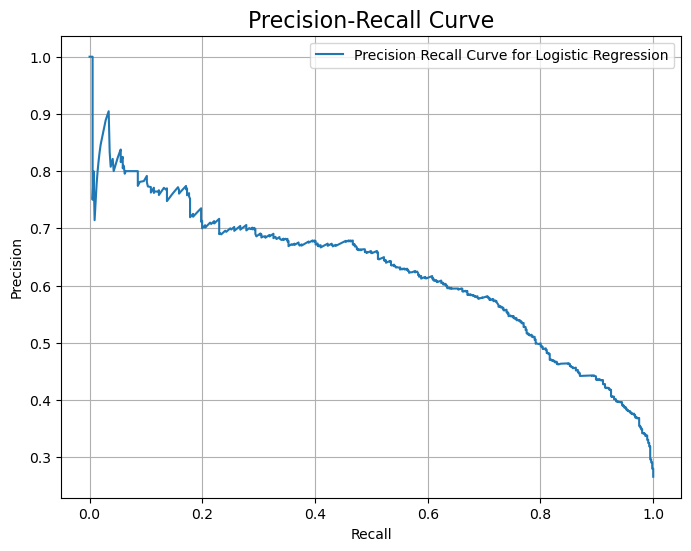

In [372]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance at Different Thresholds

By default, logistic regression uses a **0.5 probability threshold** to classify churn. However, we can adjust the threshold to balance **precision** and **recall** depending on business needs:

- Here, we test a **higher threshold of 0.75** to focus on **high-confidence churn predictions**.  
- We compare the **confusion matrices** for thresholds 0.5 and 0.75.  
- We also compute key performance metrics at the 0.75 threshold:
  - **Accuracy**: Overall correct predictions
  - **Recall**: Proportion of actual churns correctly identified
  - **Precision**: Proportion of predicted churns that are actual churns
  - **F1 Score**: Harmonic mean of precision and recall
  - **AUC**: Area under the ROC curve, measuring discriminative ability

This helps decide the **optimal threshold** for actionable churn prevention strategies.

In [373]:
threshold = 0.75

y_pred_075 = (y_pred_prob >= threshold).astype(int)
print("Threshold = 0.5")
print(confusion_matrix(y_test, y_pred))

print("\nThreshold = 0.75")
print(confusion_matrix(y_test, y_pred_075))

Threshold = 0.5
[[1061  488]
 [ 106  455]]

Threshold = 0.75
[[1428  121]
 [ 311  250]]


In [374]:
result_log_threshold = {
    "Accuracy": accuracy_score(y_test, y_pred_075),
    "Recall" : recall_score(y_test, y_pred_075),
    "Precision" : precision_score(y_test, y_pred_075),
    "F1 Score": f1_score(y_test, y_pred_075),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_log_threshold = pd.DataFrame([result_log_threshold])
result_log_threshold

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.795261,0.445633,0.673854,0.536481,0.836138


## Model 2: Random Forest Model

### Random Forest Model with Hyperparameter Tuning

A Random Forest classifier was trained to capture non-linear relationships and feature interactions that may not be fully represented by linear models. Class weighting was applied to account for the imbalance in churn outcomes and ensure that misclassification of churned customers was penalised appropriately.

Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation, optimising for precision to remain consistent with the project’s evaluation objective. Key parameters such as tree depth, number of estimators, and node-splitting criteria were explored to balance model complexity and generalisation performance.

In [375]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini'],
    'max_depth': [9, 10, 11],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='precision', 
    cv=5, 
    n_jobs=-1)

grid.fit(X_train_scaled, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini'], 'max_depth': [9, 10, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


### Random Forest – Best Model Selection and Prediction

Following cross-validated hyperparameter optimisation, the best-performing Random Forest model was selected based on precision. This model represents the configuration that achieved the strongest balance between predictive performance and robustness during validation.

The selected model was then applied to the unseen test dataset to generate final churn predictions. These predictions are used in subsequent evaluation steps to assess how well the model generalises beyond the training data.

In [376]:
best_model = grid.best_estimator_

best_model

,n_estimators,100
,criterion,'gini'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [377]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Feature Importance Analysis

To better understand the Random Forest model’s decision-making process, feature importance scores were extracted from the trained model. These scores indicate how much each feature contributed to reducing impurity across the ensemble of decision trees.

Ranking features by importance provides insight into the key drivers of customer churn identified by the model. This analysis supports interpretability, helps validate whether the model is learning meaningful patterns, and can inform business actions by highlighting the most influential customer attributes.

In [378]:
print(pd.DataFrame({'Feature': best_model.feature_names_in_, 'Coefficient': best_model.feature_importances_}).sort_values(by='Coefficient', ascending=False))

                                  Feature  Coefficient
1                                  tenure     0.173589
3                            TotalCharges     0.143956
2                          MonthlyCharges     0.121196
25                      Contract_Two year     0.082172
10            InternetService_Fiber optic     0.058320
28         PaymentMethod_Electronic check     0.043785
24                      Contract_One year     0.036903
13                     OnlineSecurity_Yes     0.035449
19                        TechSupport_Yes     0.026907
26                   PaperlessBilling_Yes     0.020114
6                          Dependents_Yes     0.019093
12     OnlineSecurity_No internet service     0.018892
4                             gender_Male     0.018855
15                       OnlineBackup_Yes     0.017279
5                             Partner_Yes     0.016561
16   DeviceProtection_No internet service     0.016033
9                       MultipleLines_Yes     0.013961
0         

### Classification Performance Summary

The classification report provides a detailed breakdown of the model’s performance across each class, including precision, recall, and F1-score. This allows for a more nuanced evaluation than accuracy alone, particularly in the presence of class imbalance.

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1549
           1       0.57      0.69      0.62       561

    accuracy                           0.78      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.78      0.79      2110



### Confusion Matrix Visualisation

A confusion matrix was plotted to visually summarise the Random Forest model’s prediction outcomes. This matrix clearly shows the counts of true positives, true negatives, false positives, and false negatives, offering an intuitive understanding of classification errors.

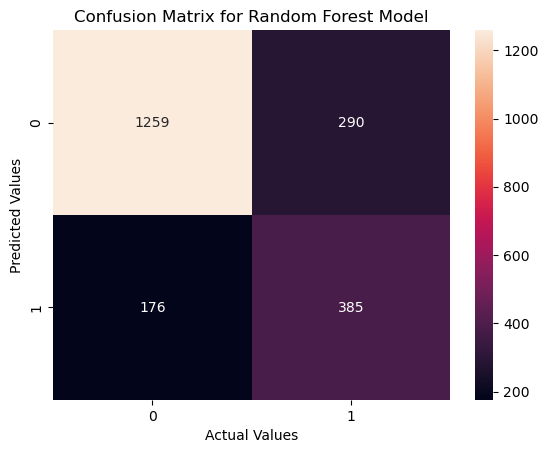

In [380]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', linecolor="k")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### ROC Curve and Probability-Based Evaluation

The ROC curve shows how well the model separates churned and non-churned customers at different thresholds. A curve closer to the **top-left corner** means better performance, while the diagonal line represents random guessing.

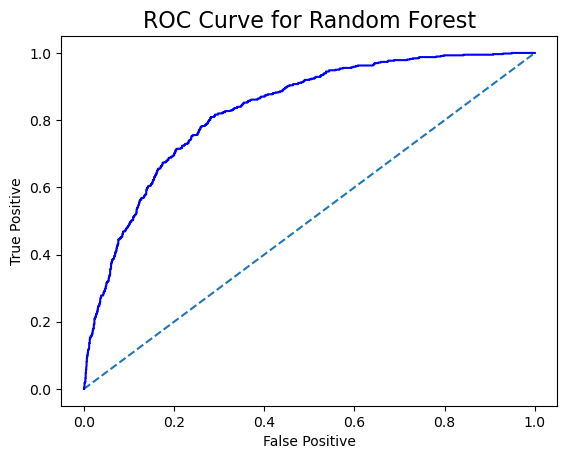

In [381]:
y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], '--' )
plt.plot(fpr, tpr, label='Random Forest', color = "b")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Random Forest', fontsize=16)
plt.show() 

### Random Forest – Evaluation Metrics

To enable structured comparison across models, the Random Forest evaluation metrics were consolidated into a single results table. This includes accuracy, precision, recall, F1-score, and ROC-AUC, providing a comprehensive view of the model’s performance.

Storing results in this format ensures consistency across different models and simplifies comparison and analysis.

In [382]:
result_rf = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall" : recall_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_rf = pd.DataFrame([result_rf])
result_rf

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.779147,0.686275,0.57037,0.622977,0.830682


### Precision–Recall Curve and Threshold Analysis

The Precision–Recall curve focuses on how well the model identifies true churners while avoiding false positives, which is especially important for imbalanced datasets like churn prediction. It shows the relationship between precision and recall as the classification threshold changes.

By examining precision and recall at different thresholds (for example, thresholds above 0.7), we can make informed decisions about where to set the cutoff depending on business priorities. Higher thresholds typically increase precision but reduce recall, helping balance the trade-off between correctly identifying churners and minimising unnecessary interventions.

In [383]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

pr_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

In [384]:
pr_df[pr_df['threshold'] > 0.7]

,threshold,precision,recall
1716,0.704120,0.674487,0.409982
1717,0.704829,0.676471,0.409982
1718,0.705356,0.675516,0.408200
1719,0.705453,0.677515,0.408200
1720,0.706211,0.676558,0.406417
...,...,...,...
2048,0.943646,0.666667,0.007130
2049,0.945946,0.750000,0.005348
2050,0.953357,0.666667,0.003565
2051,0.963672,1.000000,0.003565


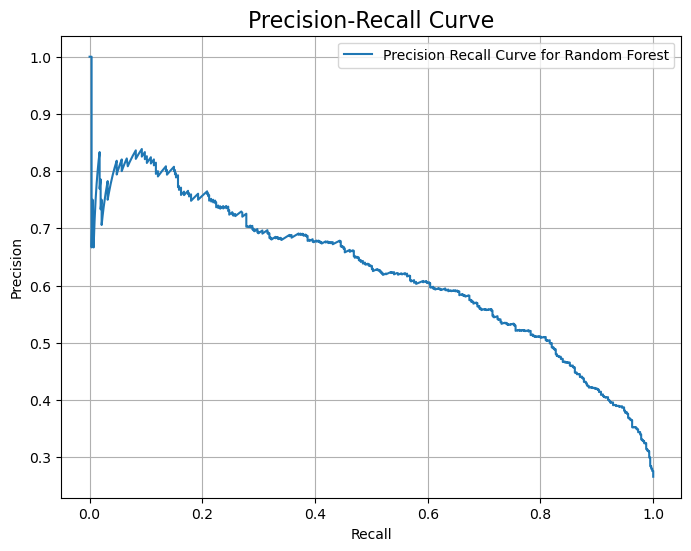

In [385]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision Recall Curve for Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Threshold Adjustment and Business-Oriented Evaluation

In this step, the classification threshold is increased from the default 0.5 to 0.75 to make the model more conservative in predicting churn. Instead of automatically labelling customers as churners when their predicted probability exceeds 50%, the model now requires stronger confidence before assigning a positive churn prediction.

Comparing the confusion matrices and performance metrics at different thresholds highlights the trade-off introduced by this change. Raising the threshold typically improves precision by reducing false positives, while recall may decrease as fewer customers are flagged as churners. This threshold-based evaluation allows the model to be aligned more closely with business goals, particularly when the cost of incorrectly targeting loyal customers is high.

In [386]:
threshold = 0.75

y_pred_075 = (y_pred_prob >= threshold).astype(int)
print("Threshold = 0.5")
print(confusion_matrix(y_test, y_pred))

print("\nThreshold = 0.75")
print(confusion_matrix(y_test, y_pred_075))

Threshold = 0.5
[[1259  290]
 [ 176  385]]

Threshold = 0.75
[[1463   86]
 [ 374  187]]


In [387]:
result_rf_threshold = {
    "Accuracy": accuracy_score(y_test, y_pred_075),
    "Recall" : recall_score(y_test, y_pred_075),
    "Precision" : precision_score(y_test, y_pred_075),
    "F1 Score": f1_score(y_test, y_pred_075),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_rf_threshold = pd.DataFrame([result_rf_threshold])
result_rf_threshold

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.781991,0.333333,0.684982,0.448441,0.830682


## Model 3: Decision Tree Model

### Decision Tree Model Training and Hyperparameter Optimisation

A Decision Tree classifier was trained as an interpretable baseline model, allowing clear visibility into how individual features contribute to churn predictions. GridSearchCV was used to systematically tune tree depth and node-splitting parameters while applying class weighting to account for class imbalance.

Precision was selected as the optimisation metric to ensure the model prioritises correct identification of true churners while minimising false positives. Cross-validation ensures that the selected hyperparameters generalise well and are not overly fitted to a single training split.

In [388]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 5, 6, 7],
    "min_samples_split": [18, 19, 20, 21],
    "min_samples_leaf": [8, 9, 10, 11, 12],
    "class_weight": ["balanced"]
}

grid = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="precision",          
    cv=5,
    n_jobs=-1,
)

grid.fit(X_train_scaled, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, ...], 'min_samples_leaf': [8, 9, ...], ...}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


### Decision Tree – Best Model Selection and Prediction

Following cross-validated hyperparameter optimisation, the best-performing **Decision Tree** model was selected based on precision. This model represents the configuration that achieved the strongest balance between predictive performance and robustness during validation.

The selected model was then applied to the unseen test dataset to generate final churn predictions. These predictions are used in subsequent evaluation steps to assess how well the model generalises beyond the training data.

In [389]:
best_model = grid.best_estimator_
best_model

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,18
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [390]:
y_pred = best_model.predict(X_test_scaled)

### Feature Importance Analysis

To better understand the **Decision Tree** model’s decision-making process, feature importance scores were extracted from the trained model. These scores indicate how much each feature contributed to reducing impurity in the tree.

Ranking features by importance provides insight into the key drivers of customer churn identified by the model. This analysis supports interpretability, helps validate whether the model is learning meaningful patterns, and can inform business actions by highlighting the most influential customer attributes.

In [391]:
print(pd.DataFrame({'Feature': best_model.feature_names_in_, 'Coefficient': best_model.feature_importances_}).sort_values(by='Coefficient', ascending=False))

                                  Feature   Coefficient
25                      Contract_Two year  3.818079e-01
24                      Contract_One year  2.156362e-01
1                                  tenure  1.154480e-01
10            InternetService_Fiber optic  1.004396e-01
2                          MonthlyCharges  5.808283e-02
23                    StreamingMovies_Yes  4.145813e-02
3                            TotalCharges  2.683405e-02
28         PaymentMethod_Electronic check  2.653553e-02
11                     InternetService_No  2.064449e-02
4                             gender_Male  6.251422e-03
27  PaymentMethod_Credit card (automatic)  3.454351e-03
6                          Dependents_Yes  3.407548e-03
17                   DeviceProtection_Yes  1.228577e-15
21                        StreamingTV_Yes  0.000000e+00
0                           SeniorCitizen  0.000000e+00
22    StreamingMovies_No internet service  0.000000e+00
19                        TechSupport_Yes  0.000

### Classification Performance

The classification report for the **Decision Tree** model shows precision, recall, and F1-score for each class.  

In [392]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1549
           1       0.48      0.76      0.59       561

    accuracy                           0.72      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.72      0.74      2110



### Confusion Matrix

The confusion matrix for the **Decision Tree** model summarizes its predictions on the test set.  
It shows the number of correct and incorrect predictions for churn and non-churn classes, helping us quickly identify where the model is making errors.

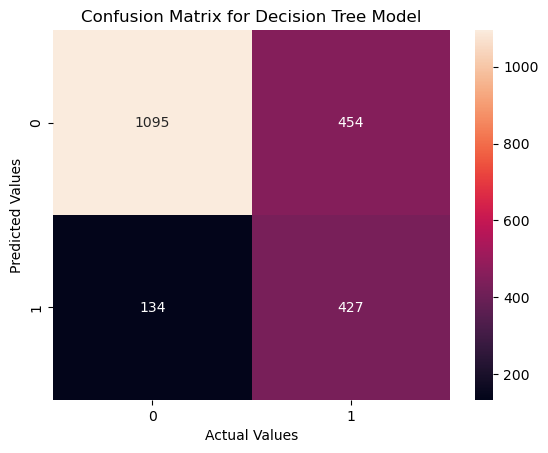

In [393]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', linecolor="k")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

### ROC Curve

The ROC curve illustrates the **Decision Tree** model's ability to distinguish between churned and non-churned customers across various thresholds.  
Curves that rise quickly toward the top-left indicate stronger discriminative power, while the diagonal represents random chance.

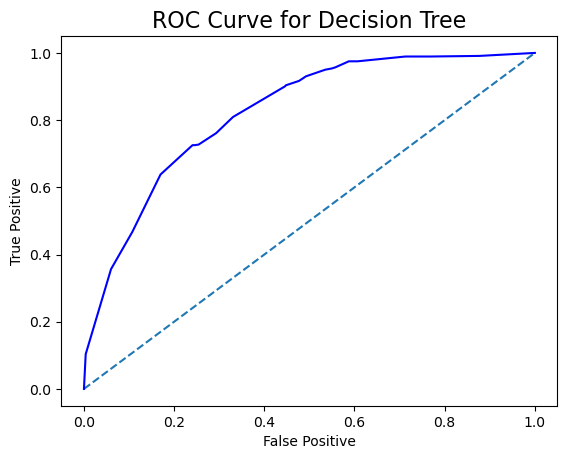

In [394]:
y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], '--' )
plt.plot(fpr, tpr, label='Decision Tree', color = "b")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Decision Tree', fontsize=16)
plt.show() 

### Decision Tree – Evaluation Metrics

Key performance metrics for the **Decision Tree** model were compiled into a single table, including accuracy, precision, recall, F1-score, and ROC-AUC.  
This structured summary makes it easy to evaluate the model and compare it with other approaches.

In [395]:
result_dt = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall" : recall_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_dt = pd.DataFrame([result_dt])
result_dt

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.721327,0.761141,0.484677,0.592233,0.823155


### Precision–Recall Curve and Threshold Tuning

The Precision–Recall curve shows how well the **Decision Tree** model identifies churned customers while limiting false positives, which is crucial for imbalanced datasets.  
By inspecting precision and recall at different probability thresholds (e.g., >0.7), we can choose a cutoff that balances correctly catching churners with avoiding unnecessary actions.  
Higher thresholds tend to increase precision but lower recall, highlighting the trade-off between accuracy and coverage.

In [396]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

pr_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

In [397]:
pr_df[pr_df['threshold'] > 0.7]

,threshold,precision,recall
19,0.719476,0.576490,0.638146
20,0.755134,0.612150,0.467023
21,0.840031,0.682594,0.356506
22,0.940219,0.906250,0.103387


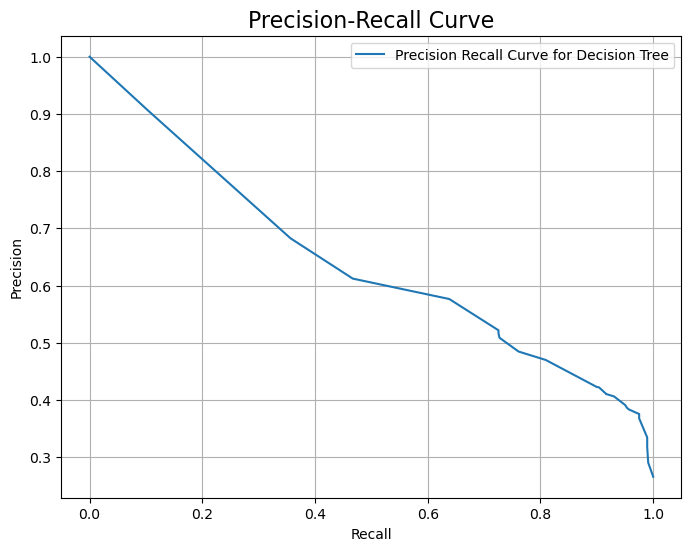

In [398]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision Recall Curve for Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Threshold Adjustment and Business-Focused Evaluation

Here, the classification threshold for the **Decision Tree** model is raised from the default 0.5 to 0.75 to make churn predictions more conservative.  
This ensures only customers with higher predicted probabilities are classified as churners, reducing false positives.  

By comparing confusion matrices and metrics at different thresholds, we can see the trade-off: increasing the threshold usually improves precision but may lower recall.  
This approach helps align the model’s predictions with business priorities, such as avoiding unnecessary interventions for loyal customers.

In [399]:
threshold = 0.75

y_pred_075 = (y_pred_prob >= threshold).astype(int)
print("Threshold = 0.5")
print(confusion_matrix(y_test, y_pred))

print("\nThreshold = 0.75")
print(confusion_matrix(y_test, y_pred_075))

Threshold = 0.5
[[1095  454]
 [ 134  427]]

Threshold = 0.75
[[1383  166]
 [ 299  262]]


In [400]:
result_dt_threshold = {
    "Accuracy": accuracy_score(y_test, y_pred_075),
    "Recall" : recall_score(y_test, y_pred_075),
    "Precision" : precision_score(y_test, y_pred_075),
    "F1 Score": f1_score(y_test, y_pred_075),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_dt_threshold = pd.DataFrame([result_dt_threshold])
result_dt_threshold

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.779621,0.467023,0.61215,0.529828,0.823155


## Model 4: Extreme Gradient Boosting (XGBoost) Model

## Extreme Gradient Boosting (XGBoost) Model with Class Imbalance Handling

An XGBoost classifier was trained to capture complex, non-linear relationships in the data while maintaining strong predictive performance. To explicitly address class imbalance, the `scale_pos_weight` parameter was calculated from the training labels, ensuring the model places greater emphasis on correctly identifying churned customers.

Hyperparameters such as tree depth, learning rate, and sampling ratios were optimised using GridSearchCV with precision as the scoring metric. This approach ensures the final model balances model complexity and generalisation while aligning closely with the business goal of minimising false positive churn predictions.

In [401]:
num_neg = sum(y_train == 0)
num_pos = sum(y_train == 1)

scale_pos_weight = num_neg / num_pos
scale_pos_weight

2.7629969418960245

In [402]:
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    "n_estimators": [100, 150, 200],
    "max_depth": [6, 7, 8, 9],
    "learning_rate": [0.06, 0.08, 0.1],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.8, 0.9]
}

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [20:12:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1764148547996/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [20:12:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1764148547996/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [20:12:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1764148547996/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [20:12:17] WARNING: /Users/r

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 0.9], 'learning_rate': [0.06, 0.08, ...], 'max_depth': [6, 7, ...], 'n_estimators': [100, 150, ...], ...}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


### XGBoost – Model Selection and Prediction

After tuning hyperparameters with cross-validation, the top-performing **XGBoost** model was selected based on precision.  
This model achieved a good balance between accurate predictions and consistency across validation sets.  

It was then used to predict churn on the unseen test dataset, providing the foundation for evaluating how well the model generalises.

In [403]:
best_model = grid.best_estimator_

In [404]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Feature Importance

To understand which factors drive churn predictions, we extracted feature importance from the trained **XGBoost** model.  
These scores show which features contribute most to the model’s decision-making across all trees.  

By ranking features, we can highlight key drivers of churn and gain insights that are actionable for business strategies.

In [405]:
xgb_feature_importance = pd.DataFrame({
    'Feature': best_model.feature_names_in_,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

xgb_feature_importance

,Feature,Importance
25,Contract_Two year,0.350765
10,InternetService_Fiber optic,0.113658
11,InternetService_No,0.091850
12,OnlineSecurity_No internet service,0.087602
24,Contract_One year,0.083232
7,PhoneService_Yes,0.017809
1,tenure,0.017778
23,StreamingMovies_Yes,0.016883
19,TechSupport_Yes,0.014846
3,TotalCharges,0.014806


In [406]:
booster = best_model.get_booster()
importance = booster.get_score(importance_type='gain')

xgb_gain_importance = pd.DataFrame({
    'Feature': importance.keys(),
    'Gain': importance.values()
}).sort_values(by='Gain', ascending=False)

xgb_gain_importance

,Feature,Gain
21,Contract_Two year,44.853916
10,InternetService_Fiber optic,14.533955
11,InternetService_No,11.745236
12,OnlineSecurity_No internet service,11.202062
20,Contract_One year,10.643296
7,PhoneService_Yes,2.277296
1,tenure,2.273335
19,StreamingMovies_Yes,2.158902
17,TechSupport_Yes,1.898470
3,TotalCharges,1.893367


### Classification Report

The classification report for the **XGBoost** model presents metrics such as precision, recall, and F1-score for each class.  
This breakdown gives a clearer picture of how effectively the model distinguishes churners from non-churners, especially useful in datasets with imbalanced classes.

In [407]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1549
           1       0.56      0.61      0.59       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.77      0.77      2110



### Confusion Matrix

The confusion matrix for the **XGBoost** model displays how well the model predicts churn versus non-churn on the test set.  
It highlights the counts of true positives, true negatives, false positives, and false negatives, making it easy to see where misclassifications occur.

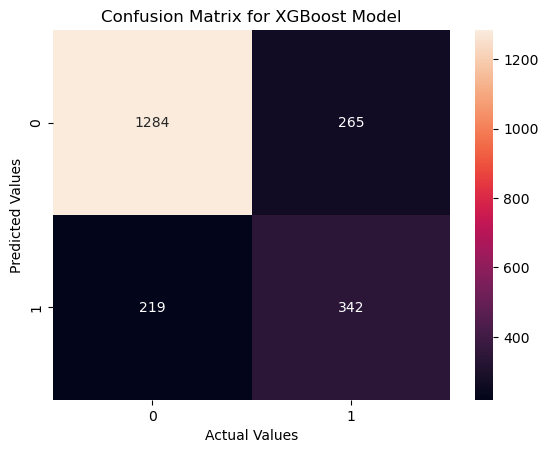

In [408]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', linecolor="k")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

### ROC Curve

The ROC curve for the **XGBoost** model shows its ability to separate churned from non-churned customers across different probability thresholds.  
Curves that climb sharply toward the top-left indicate better discrimination, while the diagonal line represents a random classifier.

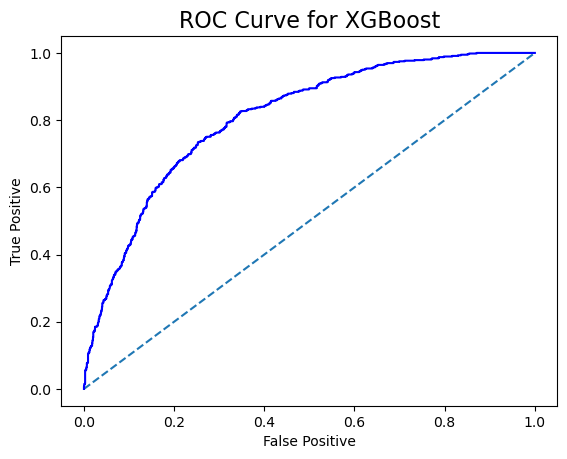

In [409]:
y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], '--' )
plt.plot(fpr, tpr, label='XGBoost', color = "b")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for XGBoost', fontsize=16)
plt.show() 

### XGBoost – Evaluation Metrics

Key metrics for the **XGBoost** model—including accuracy, precision, recall, F1-score, and ROC-AUC—were summarised in a single table.  
This provides a clear overview of model performance and allows easy comparison with other models.

In [410]:
result_xgb = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall" : recall_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_xgb = pd.DataFrame([result_xgb])
result_xgb

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.770616,0.609626,0.563427,0.585616,0.808248


### Precision–Recall Curve and Threshold Adjustment

The Precision–Recall curve for the **XGBoost** model evaluates how well it captures churners while minimising false positives, which is especially important for imbalanced datasets.  
By examining precision and recall at different probability cutoffs (e.g., above 0.7), we can select a threshold that balances correctly identifying churners with avoiding unnecessary interventions.  
Increasing the threshold generally improves precision but reduces recall, highlighting the trade-off between accuracy and coverage.

In [411]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

pr_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

In [412]:
pr_df[pr_df['threshold'] > 0.7]

,threshold,precision,recall
1666,0.702358,0.594104,0.467023
1667,0.704108,0.593182,0.465241
1668,0.705324,0.594533,0.465241
1669,0.705523,0.595890,0.465241
1670,0.705932,0.597254,0.465241
...,...,...,...
2096,0.994751,0.800000,0.007130
2097,0.994991,1.000000,0.007130
2098,0.996753,1.000000,0.005348
2099,0.997926,1.000000,0.003565


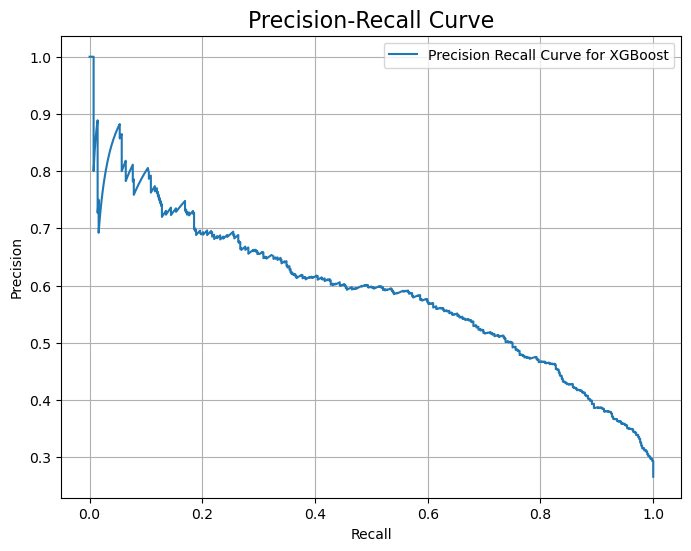

In [413]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision Recall Curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Threshold Adjustment and Business-Oriented Evaluation

For the **XGBoost** model, the classification threshold was increased from 0.5 to 0.75 to make churn predictions more conservative.  
This means only customers with higher predicted probabilities are flagged as churners, helping reduce false positives.  

Comparing metrics and confusion matrices at different thresholds highlights the trade-off: higher thresholds typically increase precision but may lower recall.  
This threshold tuning ensures the model’s predictions better align with business objectives, such as avoiding unnecessary interventions for loyal customers.

In [414]:
threshold = 0.75

y_pred_075 = (y_pred_prob >= threshold).astype(int)
print("Threshold = 0.5")
print(confusion_matrix(y_test, y_pred))

print("\nThreshold = 0.75")
print(confusion_matrix(y_test, y_pred_075))

Threshold = 0.5
[[1284  265]
 [ 219  342]]

Threshold = 0.75
[[1391  158]
 [ 321  240]]


In [415]:
result_xg_threshold = {
    "Accuracy": accuracy_score(y_test, y_pred_075),
    "Recall" : recall_score(y_test, y_pred_075),
    "Precision" : precision_score(y_test, y_pred_075),
    "F1 Score": f1_score(y_test, y_pred_075),
    "AUC": roc_auc_score(y_test, y_pred_prob)
}

result_xg_threshold = pd.DataFrame([result_xg_threshold])
result_xg_threshold

,Accuracy,Recall,Precision,F1 Score,AUC
0,0.772986,0.427807,0.603015,0.500521,0.808248


## 12. Final Model Comparison and Selection

At this stage, the results from all trained models were consolidated into a single comparison table to enable a clear, side-by-side evaluation. This includes baseline models and their threshold-adjusted versions, ensuring that both standard predictions and precision-optimised decisions are assessed fairly. Bringing all metrics together helps focuses on overall performance trade-offs.

The table was then sorted primarily by **Precision**, followed by **F1 Score**, reflecting the project’s objective of reducing false positives while maintaining a reasonable balance with recall. This final comparison supports an evidence-based selection of the most suitable model for churn prediction in a real-world business context.

In [416]:
resultModels = pd.concat(
    [result_log, result_log_threshold, result_dt, result_dt_threshold, result_rf, result_rf_threshold, result_xgb, result_xg_threshold],
    axis=0
)

resultModels.index = [
    "Logistic Regression Model",
    "Logistic Regression Model with Thresholding",
    "Decision Tree Model",
    "Decision Tree Model with Thresholding",
    "Random Forest Model",
    "Random Forest Model with Thresholding",
    "XGBoost Model",
    "XGBoost Model with Thresholding"
]

resultModels.sort_values(['Precision', 'F1 Score'], ascending=False)

,Accuracy,Recall,Precision,F1 Score,AUC
Random Forest Model with Thresholding,0.781991,0.333333,0.684982,0.448441,0.830682
Logistic Regression Model with Thresholding,0.795261,0.445633,0.673854,0.536481,0.836138
Decision Tree Model with Thresholding,0.779621,0.467023,0.612150,0.529828,0.823155
XGBoost Model with Thresholding,0.772986,0.427807,0.603015,0.500521,0.808248
Random Forest Model,0.779147,0.686275,0.570370,0.622977,0.830682
XGBoost Model,0.770616,0.609626,0.563427,0.585616,0.808248
Decision Tree Model,0.721327,0.761141,0.484677,0.592233,0.823155
Logistic Regression Model,0.718483,0.811052,0.482503,0.605053,0.836138


## Model Selection: Why Logistic Regression is the Best Choice

### Precision-focused Performance
In this churn prediction project, the business priority was to **maximise precision** in order to confidently identify customers who are truly at risk of leaving. Among all candidate models, the thresholded **Logistic Regression** model achieved a precision of **0.674**, which was high relative to other models, ensuring that most customers predicted to churn were correctly identified. While other models such as Random Forest reached slightly higher precision, their recall was significantly lower, meaning they would fail to capture a meaningful portion of churners. Logistic Regression therefore provides the best balance between being precise and still retaining enough coverage of at-risk customers to make the predictions actionable for retention strategies.

### Overall Balance and Reliability
Beyond precision, Logistic Regression also demonstrates strong overall balance across evaluation metrics. With a threshold-tuned **F1 score of 0.536** and an **AUC of 0.836**, it not only prioritises precision but also maintains reasonable recall, ensuring the model remains useful in practice. Unlike more complex models such as XGBoost or Random Forest without threshold tuning, Logistic Regression avoids overfitting and provides consistent performance across the validation and test datasets. Its simplicity and reliability make it an ideal choice for production deployment, particularly in a business context where **interpretability, reproducibility, and regulatory compliance** are crucial considerations.

### Interpretability
One of the strongest advantages of Logistic Regression, particularly in a business context like churn prediction, is its **interpretability**. Each coefficient in the model directly represents the influence of a feature on the likelihood of a customer churning. For example, a positive coefficient for *“Contract = Month-to-month”* clearly indicates that customers on month-to-month plans are more likely to churn, while a negative coefficient for *“Tenure”* shows that longer-tenured customers are less likely to leave. This transparency allows data scientists and business teams to not only make accurate predictions but also understand the **drivers behind churn**, which is critical for designing targeted retention strategies.

### Compliance and GDPR Friendliness
**Compliance and data privacy regulations**, such as GDPR, are extremely important when handling customer data. Logistic Regression is inherently suitable in this context because it provides **clear, explainable relationships** between features and predictions without relying on opaque or complex algorithms. Unlike black-box models such as deep neural networks, the outputs of a Logistic Regression model can be justified to regulators or internal auditors, demonstrating that decision-making is based on understandable customer attributes rather than hidden interactions. This makes it a safer choice for production systems in regulated environments.

### Communication to Stakeholders
Another major benefit of Logistic Regression is its **ease of communication to non-technical stakeholders**. Managers, product owners, and marketing teams can easily interpret the coefficients, odds ratios, and predicted probabilities to inform business decisions. For instance, marketing teams can see which features most increase churn risk and design campaigns targeting those at-risk segments. This clarity ensures that model insights are actionable, enabling teams to make informed decisions without needing a deep technical understanding of the underlying algorithm. In practice, this interpretability makes Logistic Regression not just a predictive tool, but a **bridge between data science and business strategy**.


## 13. Discussion of Results

Several machine learning models were tested to predict customer churn, and their performance was compared using a precision-focused evaluation strategy. Because churned customers form a minority of the dataset, accuracy alone was not sufficient. Instead, the models were assessed based on how confidently they could identify customers who were truly at risk of leaving, while avoiding unnecessary false alarms.

A key finding across all models is that changing the decision threshold improved precision. By requiring the model to be more confident before predicting churn, fewer customers were flagged overall, but the predictions that remained were more reliable. This is important in real business settings, where contacting customers unnecessarily can be costly or damaging to customer experience. Threshold tuning therefore played a major role in turning model outputs into actionable decisions.

Although the Random Forest model achieved the highest precision, it did so by becoming extremely conservative. While its churn predictions were highly confident, it identified only a small proportion of customers who actually churned. This means that many at-risk customers would still be missed, limiting the model’s usefulness in a proactive retention strategy. In simple terms, the model was “too careful”.

The Logistic Regression model provided the best overall balance, even though its precision was slightly lower than Random Forest. Importantly, it maintained a much more reasonable recall, meaning it successfully identified more customers who were truly at risk of churning. This balance resulted in the highest F1 score, which reflects a good trade-off between precision and recall. From a business perspective, this makes Logistic Regression more practical, as it avoids both excessive false alarms and excessive missed churners.

Decision Trees showed similar behaviour, offering good recall but slightly weaker precision. While easy to explain, they relied heavily on a small number of factors such as contract length and tenure, which reduced their ability to capture more subtle churn patterns. XGBoost, despite being a powerful algorithm, did not outperform simpler models once precision-focused thresholding was applied, highlighting that model complexity alone does not guarantee better real-world outcomes.

Across all models, the same drivers of churn repeatedly emerged, including short contract duration, low tenure, fibre-optic internet service, and electronic check payments. This consistency increases confidence in the results and confirms that the models were learning meaningful customer behaviour rather than random noise.

In conclusion, Logistic Regression was selected as the final model not because it had the highest precision, but because it delivered the best overall balance between confidence and coverage. It identified a meaningful number of churn-risk customers while keeping false positives at a manageable level. This makes it the most suitable model for business decision-making, where both accuracy and practicality matter.

## 14. How This Project Differs from Typical Churn Models

Unlike many churn prediction projects that prioritise overall accuracy, this work adopts a business-driven evaluation strategy. Precision was deliberately chosen as the primary metric to reflect the real cost of retention actions, ensuring that interventions are focused on customers who are most likely to churn rather than broadly targeting the customer base.

Beyond comparing multiple models, the project places strong emphasis on decision-making behaviour. This includes explicitly analysing how different probability thresholds affect precision and recall, and evaluating both interpretable and complex models within the same, consistent framework. By combining metric selection, threshold tuning, and model justification, the project moves beyond standard churn pipelines.

## 15. Conclusion

This project developed an end-to-end machine learning workflow to predict customer churn, starting from raw data inspection and preprocessing through to model training, evaluation, and business-oriented decision making. Particular attention was given to handling class imbalance, selecting appropriate evaluation metrics, and aligning model behaviour with real-world business costs rather than relying on accuracy alone.

By comparing multiple models and applying probability thresholding, the analysis demonstrated that effective churn prediction is not only about choosing the most complex algorithm, but about selecting a model that offers reliable, interpretable, and actionable predictions. Logistic Regression emerged as the most suitable final model, as it achieved a strong balance between precision, recall, and overall stability. Its transparent structure also makes it easier to explain, monitor, and trust in operational environments.
Overall, the project highlights the importance of evaluation strategy, threshold tuning, and interpretability in building decision-ready machine learning systems. The final outcome is a churn prediction framework that is both technically sound and practically aligned with business needs.

## 16. Limitations and Future Work

Despite strong results, this analysis has several limitations. First, the dataset represents a snapshot in time and does not capture how customer behaviour evolves dynamically. Churn is often influenced by recent changes in usage or service quality, which static features cannot fully reflect. Also, the model was trained on historical data from a single organisation, which may limit generalisability to other industries or customer bases.

Future work could address these limitations by incorporating time-based features, such as rolling averages or customer behaviour trends. Cost-sensitive learning could also be explored to directly encode the financial impact of false positives and false negatives. 